# Data lending club

En este notebook se desea predecir, antes de conceder un préstamo a una persona, la probabilidad de que no se devuelva completamente el crédito solicitado. 


### Para cada cliente se tiene la siguiente información: 

| LoanStatNew | Description |	
| :- |:- |
|*addr_state*|	The state provided by the borrower in the loan application									
|*all_util*|	Balance to credit limit on all trades									
|*annual_inc*|	The self-reported annual income provided by the borrower during registration.								
|*annual_inc_joint*|	The combined self-reported annual income provided by the co-borrowers during registration		
|*application_type*|	Indicates whether the loan is an individual application or a joint application with two co-borrower	|*desc*|	Loan description provided by the borrower									
|*dti*|	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.									
|*dti_joint*|	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income									
|*earliest_cr_line*|	The month the borrower's earliest reported credit line was opened									
|*emp_length*|	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 									
|*emp_title*|	The job title supplied by the Borrower when applying for the loan.								
|*fico_range_high*|	The upper boundary range the borrower’s FICO at loan origination belongs to.									
|*fico_range_low*|	The lower boundary range the borrower’s FICO at loan origination belongs to.									
|*grade*|	LC assigned loan grade									
|*home_ownership*|	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.									
|*id*|	A unique LC assigned ID for the loan listing.									
|*il_util*|	Ratio of total current balance to high credit/credit limit on all install acct									
|*initial_list_status*|	The initial listing status of the loan. Possible values are – W, F									
|*inq_fi*|	Number of personal finance inquiries									
|*inq_last_12m*|	Number of credit inquiries in past 12 months									
|*installment*|	The monthly payment owed by the borrower if the loan originates.									
|*int_rate*|	Interest Rate on the loan									
|*loan_amnt*|	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.									
|*loan_status*|	Current status of the loan									
|*max_bal_bc*|	Maximum current balance owed on all revolving accounts									
|*member_id*|	A unique LC assigned Id for the borrower member.									
|*mo_sin_old_il_acct*|	Months since oldest bank installment account opened									
|*mo_sin_old_rev_tl_op*|	Months since oldest revolving account opened									
|*mort_acc*|	Number of mortgage accounts.									
|*mths_since_last_delinq*|	The number of months since the borrower's last delinquency.									
|*mths_since_last_major_derog*|	Months since most recent 90-day or worse rating									
|*mths_since_last_record*|	The number of months since the last public record.									
|*mths_since_rcnt_il*|	Months since most recent installment accounts opened									
|*mths_since_recent_bc_dlq*|	Months since most recent bankcard delinquency									
|*mths_since_recent_revol_delinq*|	Months since most recent revolving delinquency.									
|*open_acc*|	The number of open credit lines in the borrower's credit file.									
|*open_acc_6m*|	Number of open trades in last 6 months									
|*open_il_12m*|	Number of installment accounts opened in past 12 months									
|*open_il_24m*|	Number of installment accounts opened in past 24 months									
|*open_il_6m*|	Number of currently active installment trades									
|*open_rv_12m*|	Number of revolving trades opened in past 12 months									
|*open_rv_24m*|	Number of revolving trades opened in past 24 months									
|*pub_rec*|	Number of derogatory public records									
|*pub_rec_bankruptcies*|	Number of public record bankruptcies									
|*purpose*|	A category provided by the borrower for the loan request. 									
|*revol_util*|	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.									
|*sub_grade*|	LC assigned loan subgrade									
|*term*|	The number of payments on the loan. Values are in months and can be either 36 or 60.									
|*title*|	The loan title provided by the borrower									
|*total_acc*|	The total number of credit lines currently in the borrower's credit file									
|*total_bal_il*|	Total current balance of all installment accounts									
|*total_cu_tl*|	Number of finance trades									
|*url*|	URL for the LC page with listing data.									
|*verification_status*|	Indicates if income was verified by LC, not verified, or if the income source was verified									
|*verified_status_joint*|	Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified									
|*zip_code*|	The first 3 numbers of the zip code provided by the borrower in the loan application.						

### 1. Preprocessing básico


En primer lugar, importamos las librerías que vamos a usar durante todo el proyecto

In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.impute import KNNImputer
import scipy.stats as ss
import warnings

Es importante visualizar cómo es nuestra base de datos

In [223]:
#aprendizaje_supervisado_practica_1/
data = pd.read_csv('pd_data_initial_preprocessing.csv')

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.



In [224]:
data.head()

id                                                url zip_code  \
0  112435993  https://lendingclub.com/browse/loanDetail.acti...    148xx   
1  112290210  https://lendingclub.com/browse/loanDetail.acti...    021xx   
2  112436985  https://lendingclub.com/browse/loanDetail.acti...    018xx   
3  112439006  https://lendingclub.com/browse/loanDetail.acti...    913xx   
4  112438929  https://lendingclub.com/browse/loanDetail.acti...    560xx   

   mths_since_last_record  il_util  mths_since_recent_bc_dlq  \
0                     NaN      NaN                       NaN   
1                     NaN     69.0                       NaN   
2                     NaN      NaN                       NaN   
3                     NaN     95.0                       NaN   
4                     NaN     72.0                      26.0   

   mths_since_rcnt_il  all_util  inq_fi  max_bal_bc  ...  initial_list_status  \
0                 NaN      55.0     1.0      2315.0  ...                    w   
1                26.0      94.0     0.0      1962.0  ...                    w   
2                10.0      45.0     1.0      1950.0  ...                    w   
3                 6.0      60.0     1.0      4240.0  ...                    w   
4               127.0      78.0     0.0      2996.0  ...                    w   

   application_type  pub_rec  pub_rec_bankruptcies  loan_amnt  mort_acc  \
0        Individual      0.0                   0.0     2300.0       0.0   
1        Individual      0.0                   0.0    16000.0       7.0   
2        Individual      0.0                   0.0     6025.0       2.0   
3        Individual      0.0                   0.0    20400.0       0.0   
4        Individual      0.0                   0.0    13000.0       1.0   

   mo_sin_old_rev_tl_op  open_acc  earliest_cr_line_month  \
0                 381.0       4.0                     9.0   
1                 300.0       9.0                     6.0   
2                 180.0      11.0                     6.0   
3                 125.0      15.0                     1.0   
4                 184.0       5.0                     2.0   

   earliest_cr_line_year  
0                 1985.0  
1                 1992.0  
2                 2002.0  
3                 2007.0  
4                 2002.0  

[5 rows x 51 columns]

Hay 51 variables (columns) en total: ya hemos aclarado qué significan cada una de ellas. Después haremos un análisis de ellas en mayor profundidad

Veamos el tipo de variables que tenemos

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884884 entries, 0 to 884883
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              884884 non-null  object 
 1   url                             884876 non-null  object 
 2   zip_code                        884876 non-null  object 
 3   mths_since_last_record          155100 non-null  float64
 4   il_util                         216581 non-null  float64
 5   mths_since_recent_bc_dlq        225434 non-null  float64
 6   mths_since_rcnt_il              242773 non-null  float64
 7   all_util                        249497 non-null  float64
 8   inq_fi                          249524 non-null  float64
 9   max_bal_bc                      249524 non-null  float64
 10  total_cu_tl                     249524 non-null  float64
 11  open_acc_6m                     249524 non-null  float64
 12  open_act_il     

Son 51 variables y 884884 observaciones. 
No todas las variables son numéricas, así que habrá que ver cómo trabajar con ellas (39 numéricas, 12 no).

Eliminamos las variables id, url, zip_code y emp_title del dataset, ya que no nos aportan información.

In [226]:
data=data.drop(['id','url','zip_code'],axis=1)

También eliminamos las observaciones con todo valores nulos

In [227]:
data = data.dropna(axis=0,how='all')

Ahora tenemos 48 variables, veamos cómo están distribuidas.

In [228]:
data.describe().T

count          mean            std  \
mths_since_last_record          155100.0     69.193056      26.469788   
il_util                         216581.0     68.935964      24.314068   
mths_since_recent_bc_dlq        225434.0     39.128632      22.793899   
mths_since_rcnt_il              242773.0     21.217005      25.439242   
all_util                        249497.0     58.072927      20.934080   
inq_fi                          249524.0      0.985092       1.470832   
max_bal_bc                      249524.0   5746.256717    5503.678029   
total_cu_tl                     249524.0      1.448702       2.616477   
open_acc_6m                     249524.0      0.897461       1.106632   
open_act_il                     249524.0      2.880861       3.088793   
open_il_12m                     249524.0      0.635133       0.862520   
total_bal_il                    249524.0  36064.207283   44125.271780   
open_rv_12m                     249524.0      1.300973       1.500241   
open_rv_24m                     249524.0      2.801438       2.618932   
open_il_24m                     249524.0      1.546993       1.532556   
inq_last_12m                    249524.0      2.056379       2.344495   
mths_since_last_major_derog     251613.0     44.428925      22.381966   
mths_since_recent_revol_delinq  315834.0     35.274040      22.443438   
mths_since_last_delinq          453449.0     33.659163      21.904699   
emp_length                      833683.0      6.071254       3.584866   
mo_sin_old_il_acct              859262.0    127.252767      52.470847   
revol_util                      884387.0     52.960216      24.014491   
dti                             884615.0     18.903262      11.722350   
annual_inc                      884876.0  77102.415266  135491.609288   
sub_grade                       884876.0      2.982807       1.429335   
term                            884876.0     43.426152      11.094145   
int_rate                        884876.0     13.113816       4.611939   
installment                     884876.0    440.549628     254.920865   
total_acc                       884876.0     25.111583      12.022320   
fico_range_low                  884876.0    694.698726      30.936483   
fico_range_high                 884876.0    698.698854      30.937106   
pub_rec                         884876.0      0.226261       0.622785   
pub_rec_bankruptcies            884876.0      0.134489       0.380002   
loan_amnt                       884876.0  14975.072016    8804.519267   
mort_acc                        884876.0      1.653662       1.983354   
mo_sin_old_rev_tl_op            884876.0    184.482419      95.630040   
open_acc                        884876.0     11.817683       5.584597   
earliest_cr_line_month          884876.0      6.751170       3.366211   
earliest_cr_line_year           884876.0   1998.594400       7.703791   

                                    min       25%       50%       75%  \
mths_since_last_record             0.00     51.00     69.00     88.00   
il_util                            0.00     54.00     71.00     86.00   
mths_since_recent_bc_dlq           0.00     20.00     37.00     58.00   
mths_since_rcnt_il                 0.00      7.00     14.00     24.00   
all_util                           0.00     44.00     59.00     73.00   
inq_fi                             0.00      0.00      0.00      1.00   
max_bal_bc                         0.00   2300.00   4397.00   7504.00   
total_cu_tl                        0.00      0.00      0.00      2.00   
open_acc_6m                        0.00      0.00      1.00      1.00   
open_act_il                        0.00      1.00      2.00      3.00   
open_il_12m                        0.00      0.00      0.00      1.00   
total_bal_il                       0.00   9233.00  23604.00  46690.00   
open_rv_12m                        0.00      0.00      1.00      2.00   
open_rv_24m                        0.00      1.00      2.00      4.00   
open_il_24m        

En este caso, medias y varianzas difieren bastante entre algunas variables, por lo que seguramente vayamos a tener que estandarizar en alguno de los métodos que se utilicen.

Vamos a ver cuántos valores nulos hay por variable

In [229]:
data.isna().sum()

mths_since_last_record            729776
il_util                           668295
mths_since_recent_bc_dlq          659442
mths_since_rcnt_il                642103
all_util                          635379
inq_fi                            635352
max_bal_bc                        635352
total_cu_tl                       635352
open_acc_6m                       635352
open_act_il                       635352
open_il_12m                       635352
total_bal_il                      635352
open_rv_12m                       635352
open_rv_24m                       635352
open_il_24m                       635352
inq_last_12m                      635352
mths_since_last_major_derog       633263
mths_since_recent_revol_delinq    569042
mths_since_last_delinq            431427
emp_title                          52693
emp_length                         51193
mo_sin_old_il_acct                 25614
revol_util                           489
dti                                  261
verification_sta

Habrá que tener cuidado, ya que muchas variables del dataset tienen nulos. En especial habrá que estudiar cómo imputar los valores y si merece la pena hacerlo con las variables con porcentajes tan altos de nulos. 


Vamos a ver también la cantidad de valores únicos que hay en cada variable

In [230]:
data.nunique()

mths_since_last_record               122
il_util                              221
mths_since_recent_bc_dlq             162
mths_since_rcnt_il                   307
all_util                             165
inq_fi                                25
max_bal_bc                         23621
total_cu_tl                           46
open_acc_6m                           15
open_act_il                           45
open_il_12m                           12
total_bal_il                       88946
open_rv_12m                           25
open_rv_24m                           43
open_il_24m                           19
inq_last_12m                          37
mths_since_last_major_derog          171
mths_since_recent_revol_delinq       163
mths_since_last_delinq               157
emp_title                         214509
emp_length                            10
mo_sin_old_il_acct                   520
revol_util                          1271
dti                                 6756
verification_sta

Resalta sobretodo emp_title, que siendo una variable categórica, tiene 214509 valores distintos. Vamos a estudiarla en mayor profundidad.

In [231]:
data['emp_title'].value_counts()[:20]

Teacher               17113
Manager               14553
Owner                  8089
Registered Nurse       6912
RN                     6618
Supervisor             6327
Sales                  5542
Driver                 5205
Project Manager        4913
Office Manager         4336
Director               4044
General Manager        3967
owner                  3756
manager                3587
teacher                3416
President              3318
Engineer               3303
Vice President         2839
driver                 2747
Operations Manager     2634
Name: emp_title, dtype: int64

<BarContainer object of 20 artists>

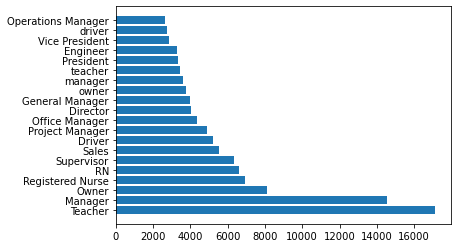

In [232]:
plt.barh(data.emp_title.value_counts()[:20].index, data.emp_title.value_counts()[:20])

Es inviable hacer un análisis utilizando esta variable por la cantidad de valores únicos que tiene, por lo que la eliminaremos también.

In [233]:
data=data.drop(['emp_title'],axis=1)

Para terminar el análisis descriptivo de las variables, representaremos las continuas en forma de histograma y boxplot y las categóricas en gráficos de barras.

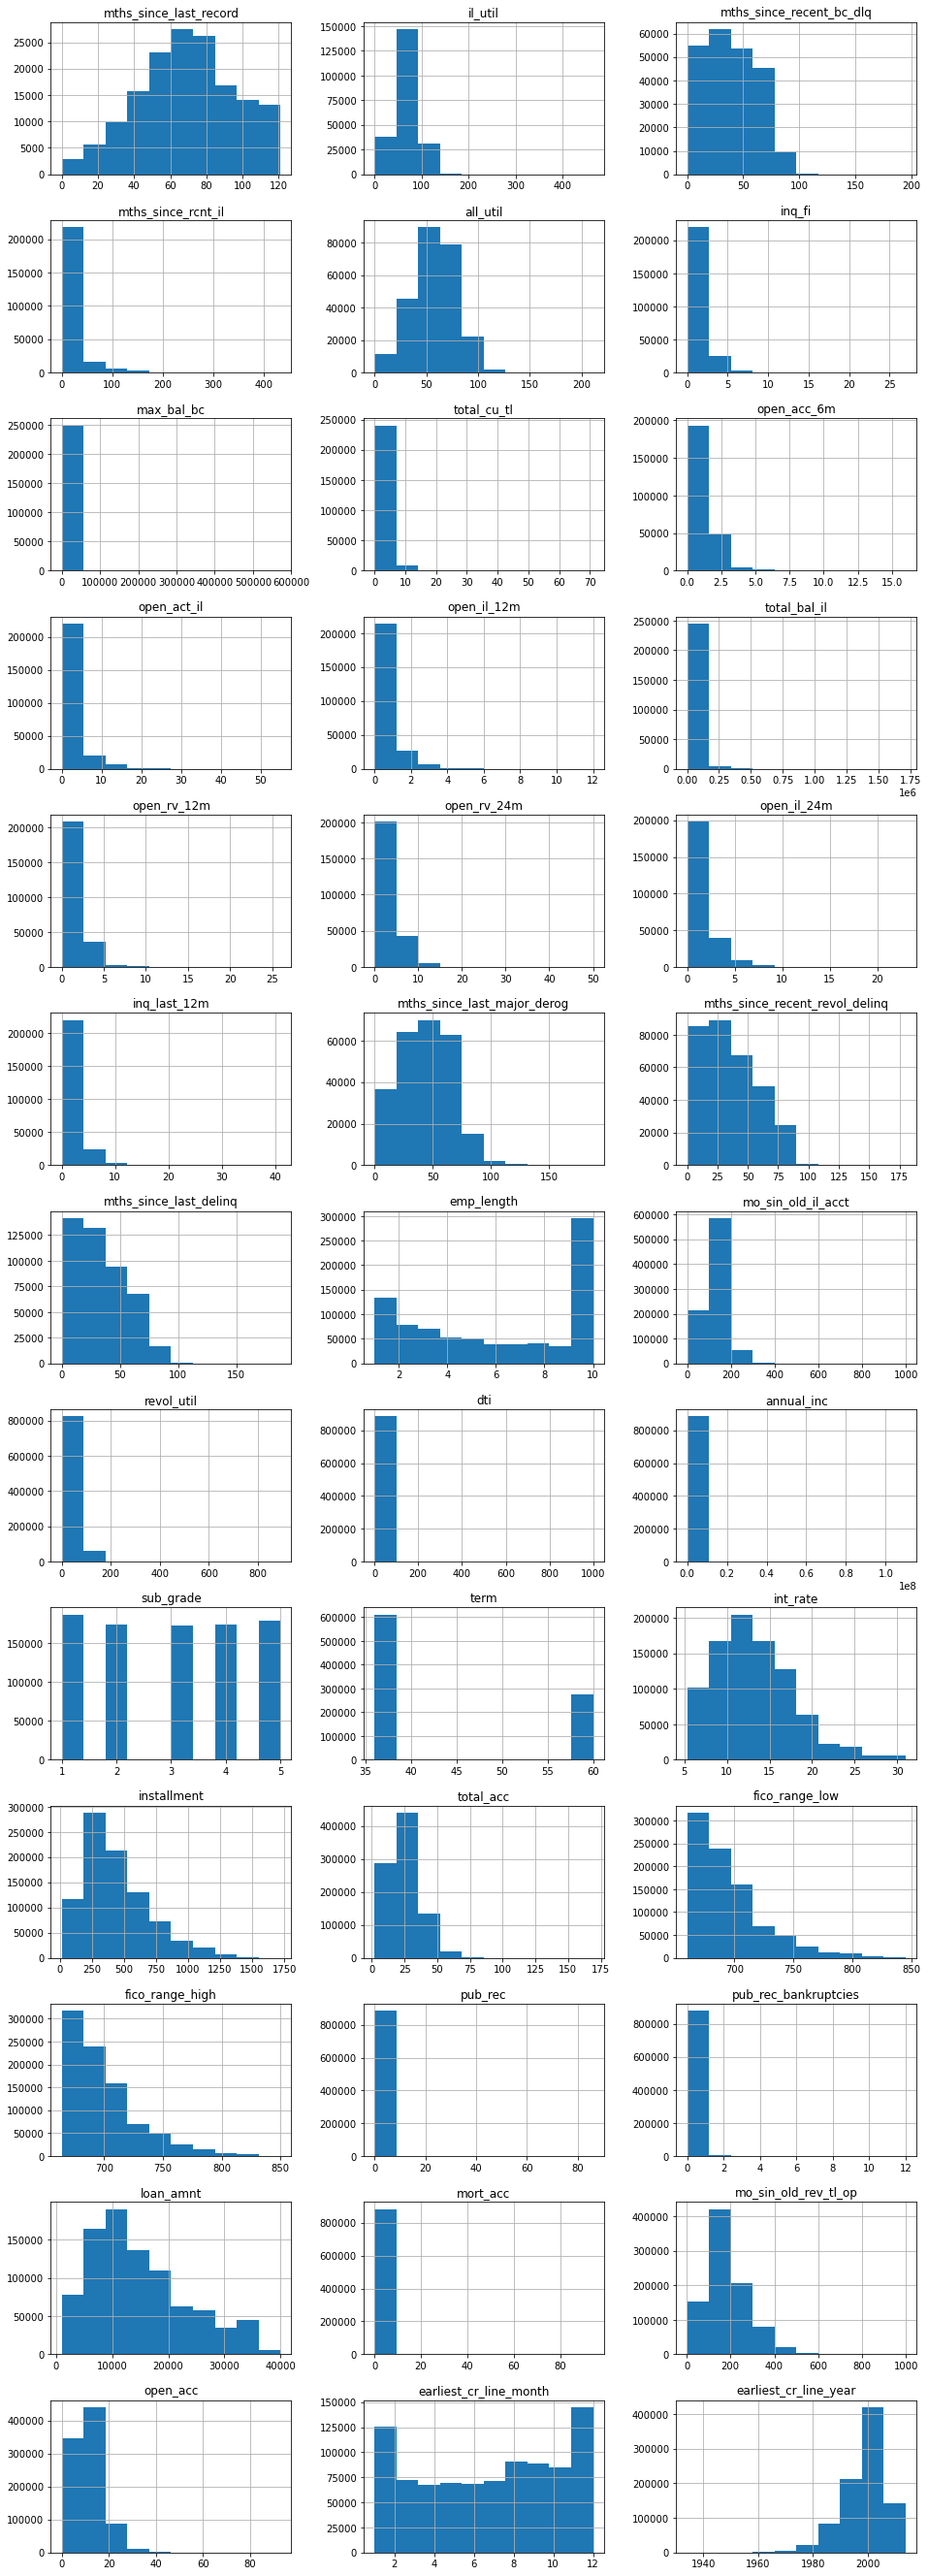

In [234]:
data.hist(figsize=(16,48),layout=(13,3)) #bins son la cantidad de barras
plt.show()

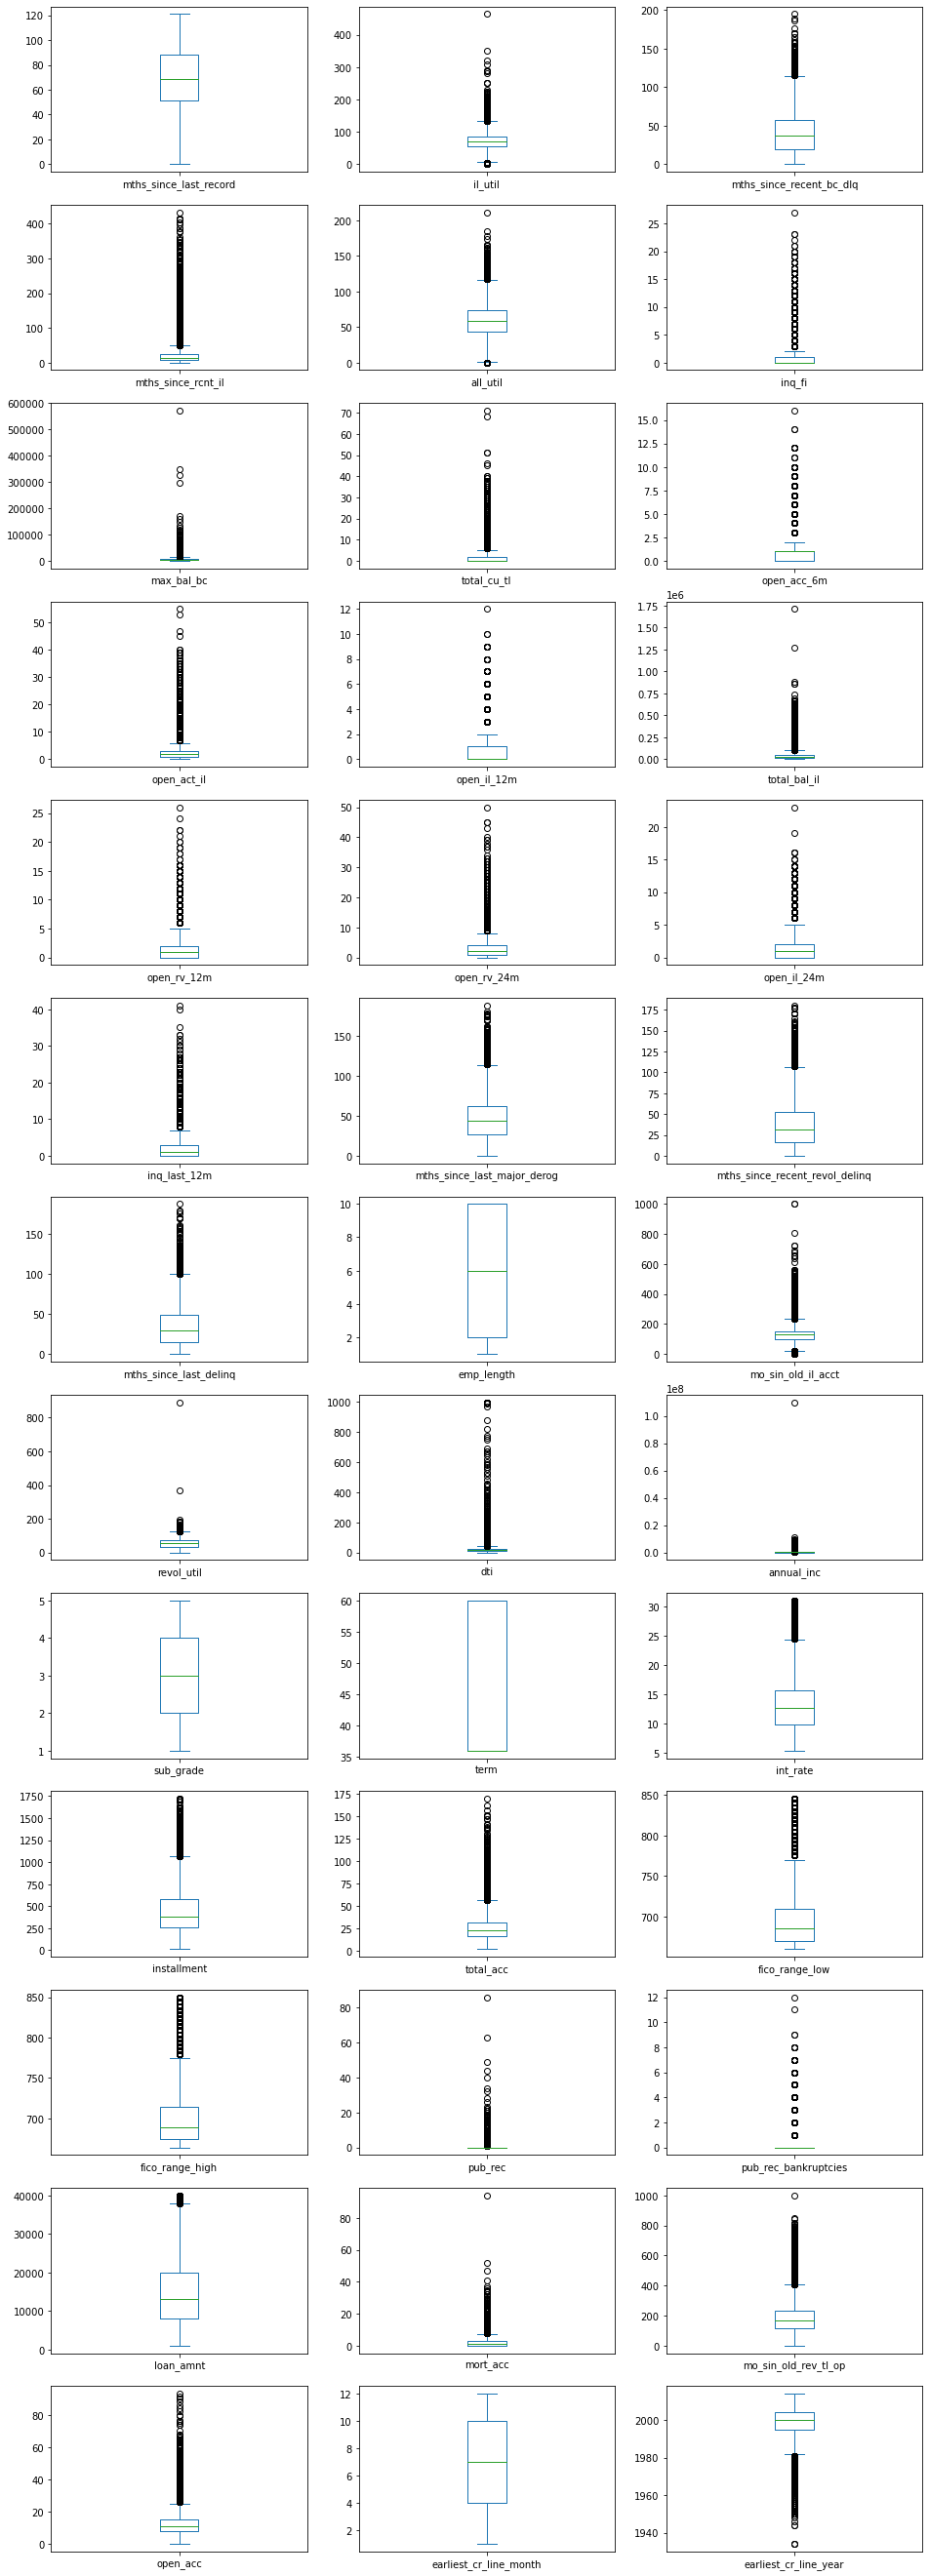

In [235]:
data.plot(figsize=(16,48),kind='box', subplots=True,layout=(13,3),sharex=False, sharey=False)
plt.show()

Hay un outlier muy claro que puede estar afectando a la variable anual_inc,variable que indica los ingresos anuales autodeclarados proporcionados por el prestatario durante el registro.
Veamos mejor el outlier:

<AxesSubplot:xlabel='annual_inc'>

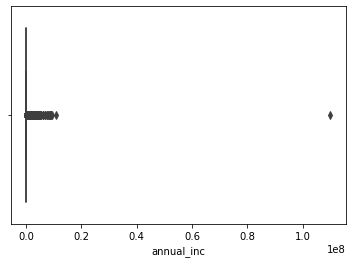

In [236]:
sns.boxplot(x=data['annual_inc'])

In [237]:
data['annual_inc'].max()

110000000.0

Vamos a retirar el outlier por poder ser un punto potencialmente muy influyente a la hora de construir los modelos.

In [238]:
data = data[(data['annual_inc']<100000000.0)]

Otro outlier claro que se observa es en la variable revol_util, la que nos dice la cantidad de crédito que el prestatario está utilizando en relación con todo el crédito renovable disponible.
Veamos mejor ese outlier:

<AxesSubplot:xlabel='revol_util'>

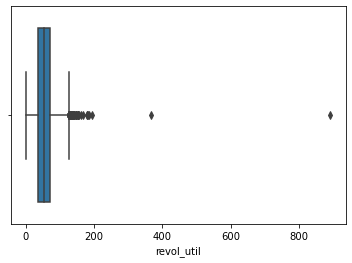

In [239]:
sns.boxplot(x=data['revol_util'])

In [240]:
data['revol_util'].max()

892.3

Hemos decidido dejar estos outliers porque no vemos conveniente retirarlos por una posible pérdida de información.

Otro outlier destacable que se observa es en la variable 'mort_acc', que nos dice el número de cuentas hipotecarias. Veamos mejor ese outlier:

<AxesSubplot:xlabel='mort_acc'>

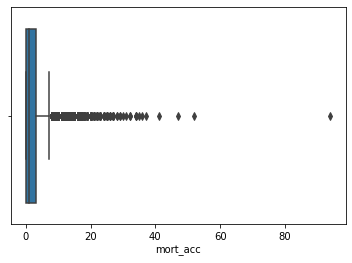

In [241]:
sns.boxplot(x=data['mort_acc'])

In [242]:
data['mort_acc'].max()

94.0

Se trata de un outlier en la variable mort_acc que puede influenciar a los cálculos. Ya que no es nada común en los datos que se tengan 94 hipotecas, consideramos que en este caso es mejor eliminarlo. 

In [243]:
data = data[(data['mort_acc']<60)]

Finalmente, representamos las variables categóricas en gráficos de barras y vemos cómo se distribuyen los datos en sus distintas categorías

<AxesSubplot:title={'center':'purpose'}>

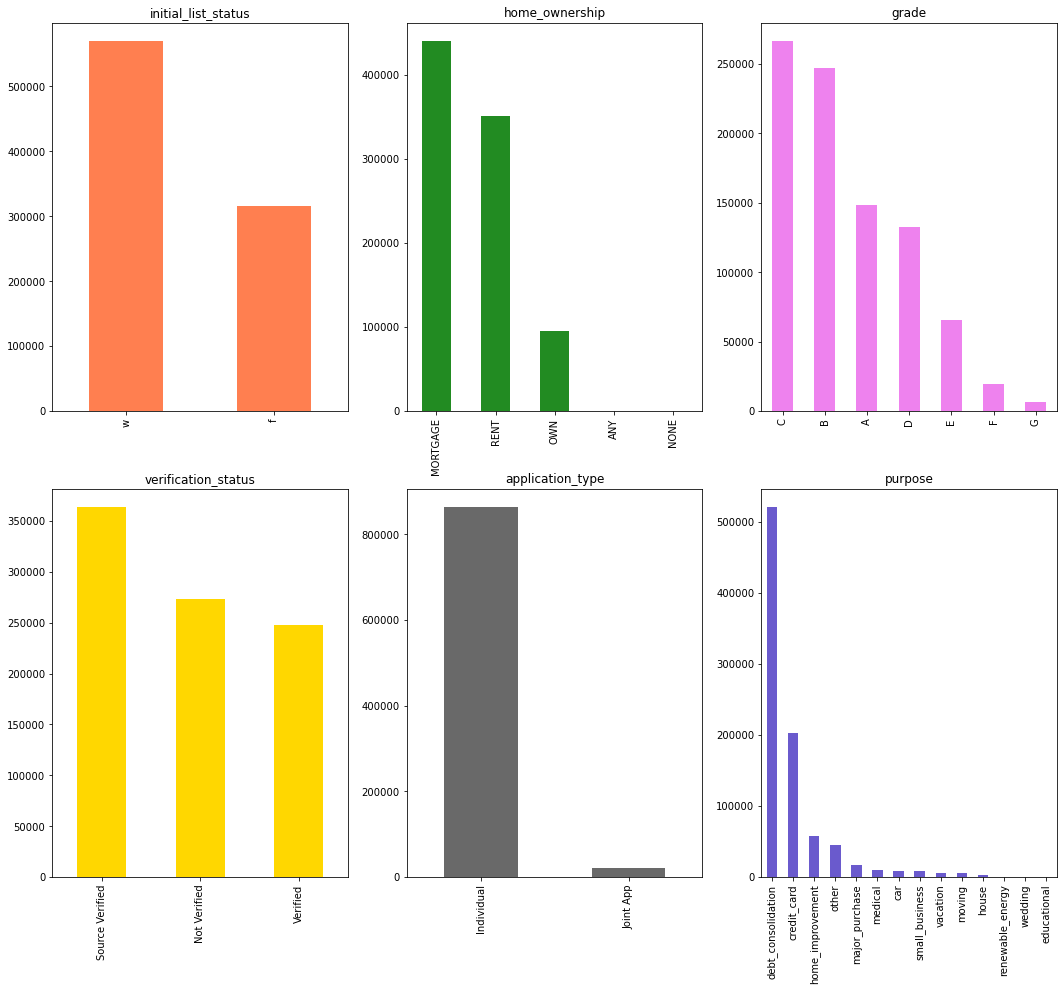

In [244]:
plt.figure(figsize=(18, 50))

plt.subplot(6, 3, 1)
data['initial_list_status'].value_counts().plot(kind='bar',color = 'coral',linewidth = 3,title='initial_list_status')

plt.subplot(6, 3, 2)
data['home_ownership'].value_counts().plot(kind='bar',color = 'forestgreen',linewidth = 3,title='home_ownership')

plt.subplot(6, 3, 3)
data['grade'].value_counts().plot(kind='bar',color = 'violet',linewidth = 3,title='grade')

plt.subplot(6, 3, 4)
data['verification_status'].value_counts().plot(kind='bar',color = 'gold',linewidth = 3,title='verification_status')

plt.subplot(6, 3, 5)
data['application_type'].value_counts().plot(kind='bar',color = 'dimgray',linewidth = 3,title='application_type')

plt.subplot(6, 3, 6)
data['purpose'].value_counts().plot(kind='bar',color = 'slateblue',linewidth = 3,title='purpose')

Vamos a estudiar la distribución de la variable objetivo loan_status, que indica el estado actual del préstamo y es una variable categórica.

In [245]:
data['loan_status'].value_counts()

Current               422683
Fully Paid            345520
Charged Off            97047
Late (31-120 days)     11168
In Grace Period         5507
Late (16-30 days)       2915
Default                   34
Name: loan_status, dtype: int64

<AxesSubplot:>

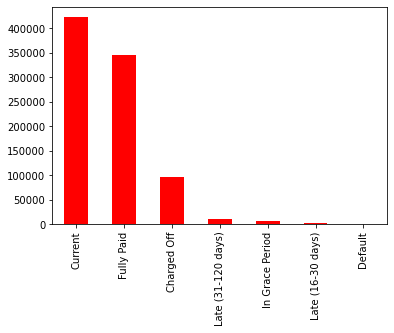

In [246]:
data['loan_status'].value_counts().plot(kind='bar',color = 'red',linewidth = 3)

Loan_status es una variable categórica con 7 niveles  y sin valores nulos. La mayoría de los valores son "current" (Actual) y "fully paid" (Totalmente pagado). Más adelante reduciremos el número de categroías de esta variable para mejorar la efectividad de los algoritmos


Por último, calcularemos la correlación entre variables.

In [247]:
data.corr()

mths_since_last_record   il_util  \
mths_since_last_record                        1.000000 -0.037540   
il_util                                      -0.037540  1.000000   
mths_since_recent_bc_dlq                     -0.057360  0.060892   
mths_since_rcnt_il                           -0.032272 -0.279929   
all_util                                     -0.014922  0.593590   
inq_fi                                       -0.042597  0.150360   
max_bal_bc                                    0.000346 -0.112540   
total_cu_tl                                   0.004893  0.028667   
open_acc_6m                                  -0.055815  0.165298   
open_act_il                                  -0.002077  0.328907   
open_il_12m                                  -0.001326  0.328236   
total_bal_il                                 -0.003023  0.334039   
open_rv_12m                                  -0.104838  0.068071   
open_rv_24m                                  -0.115880  0.076814   
open_il_24m                                   0.020599  0.300043   
inq_last_12m                                 -0.066671  0.167643   
mths_since_last_major_derog                   0.036692 -0.003623   
mths_since_recent_revol_delinq               -0.074116  0.059719   
mths_since_last_delinq                       -0.035102  0.044520   
emp_length                                    0.027933 -0.109813   
mo_sin_old_il_acct                           -0.063511  0.002828   
revol_util                                    0.046660 -0.053167   
dti                                           0.063109 -0.013754   
annual_inc                                   -0.079275 -0.051043   
sub_grade                                     0.008761  0.042975   
term                                          0.037984  0.016406   
int_rate                                     -0.001758  0.157807   
installment                                  -0.016476 -0.087767   
total_acc                                    -0.159056  0.118818   
fico_range_low                                0.210486 -0.131003   
fico_range_high                               0.210486 -0.131003   
pub_rec                                      -0.271428  0.014497   
pub_rec_bankruptcies                          0.237999  0.016969   
loan_amnt                                    -0.005499 -0.097055   
mort_acc                                     -0.126552 -0.047261   
mo_sin_old_rev_tl_op                         -0.130708 -0.110368   
open_acc                                      0.032690  0.135907   
earliest_cr_line_month                        0.003539  0.019291   
earliest_cr_line_year                         0.122281  0.084515   

                                mths_since_recent_bc_dlq  mths_since_rcnt_il  \
mths_since_last_record                         -0.057360           -0.032272   
il_util                                         0.060892           -0.279929   
mths_since_recent_bc_dlq                        1.000000           -0.032014   
mths_since_rcnt_il                             -0.032014            1.000000   
all_util                                        0.044854           -0.121877   
inq_fi                                          0.036746           -0.210668   
max_bal_bc                                     -0.017694            0.017870   
total_cu_tl                                     0.005230           -0.140430   
open_acc_6m                                     0.069366           -0.184568   
open_act_il                                    -0.017292           -0.212203   
open_il_12m                                     0.058737           -0.445131   
total_bal_il                                    0.005867           -0.238773   
open_rv_12m                                     0.092344           -0.029952   
open_rv_24m                                     0.131578           -0.044181   
open_il_24m                                     0.069346           -0.488457   
inq_last_12m                   

A priori, no hay correlaciones muy altas entre variables, exceptuando algún caso. Se pueden ver de manera mas visual así:

<AxesSubplot:>

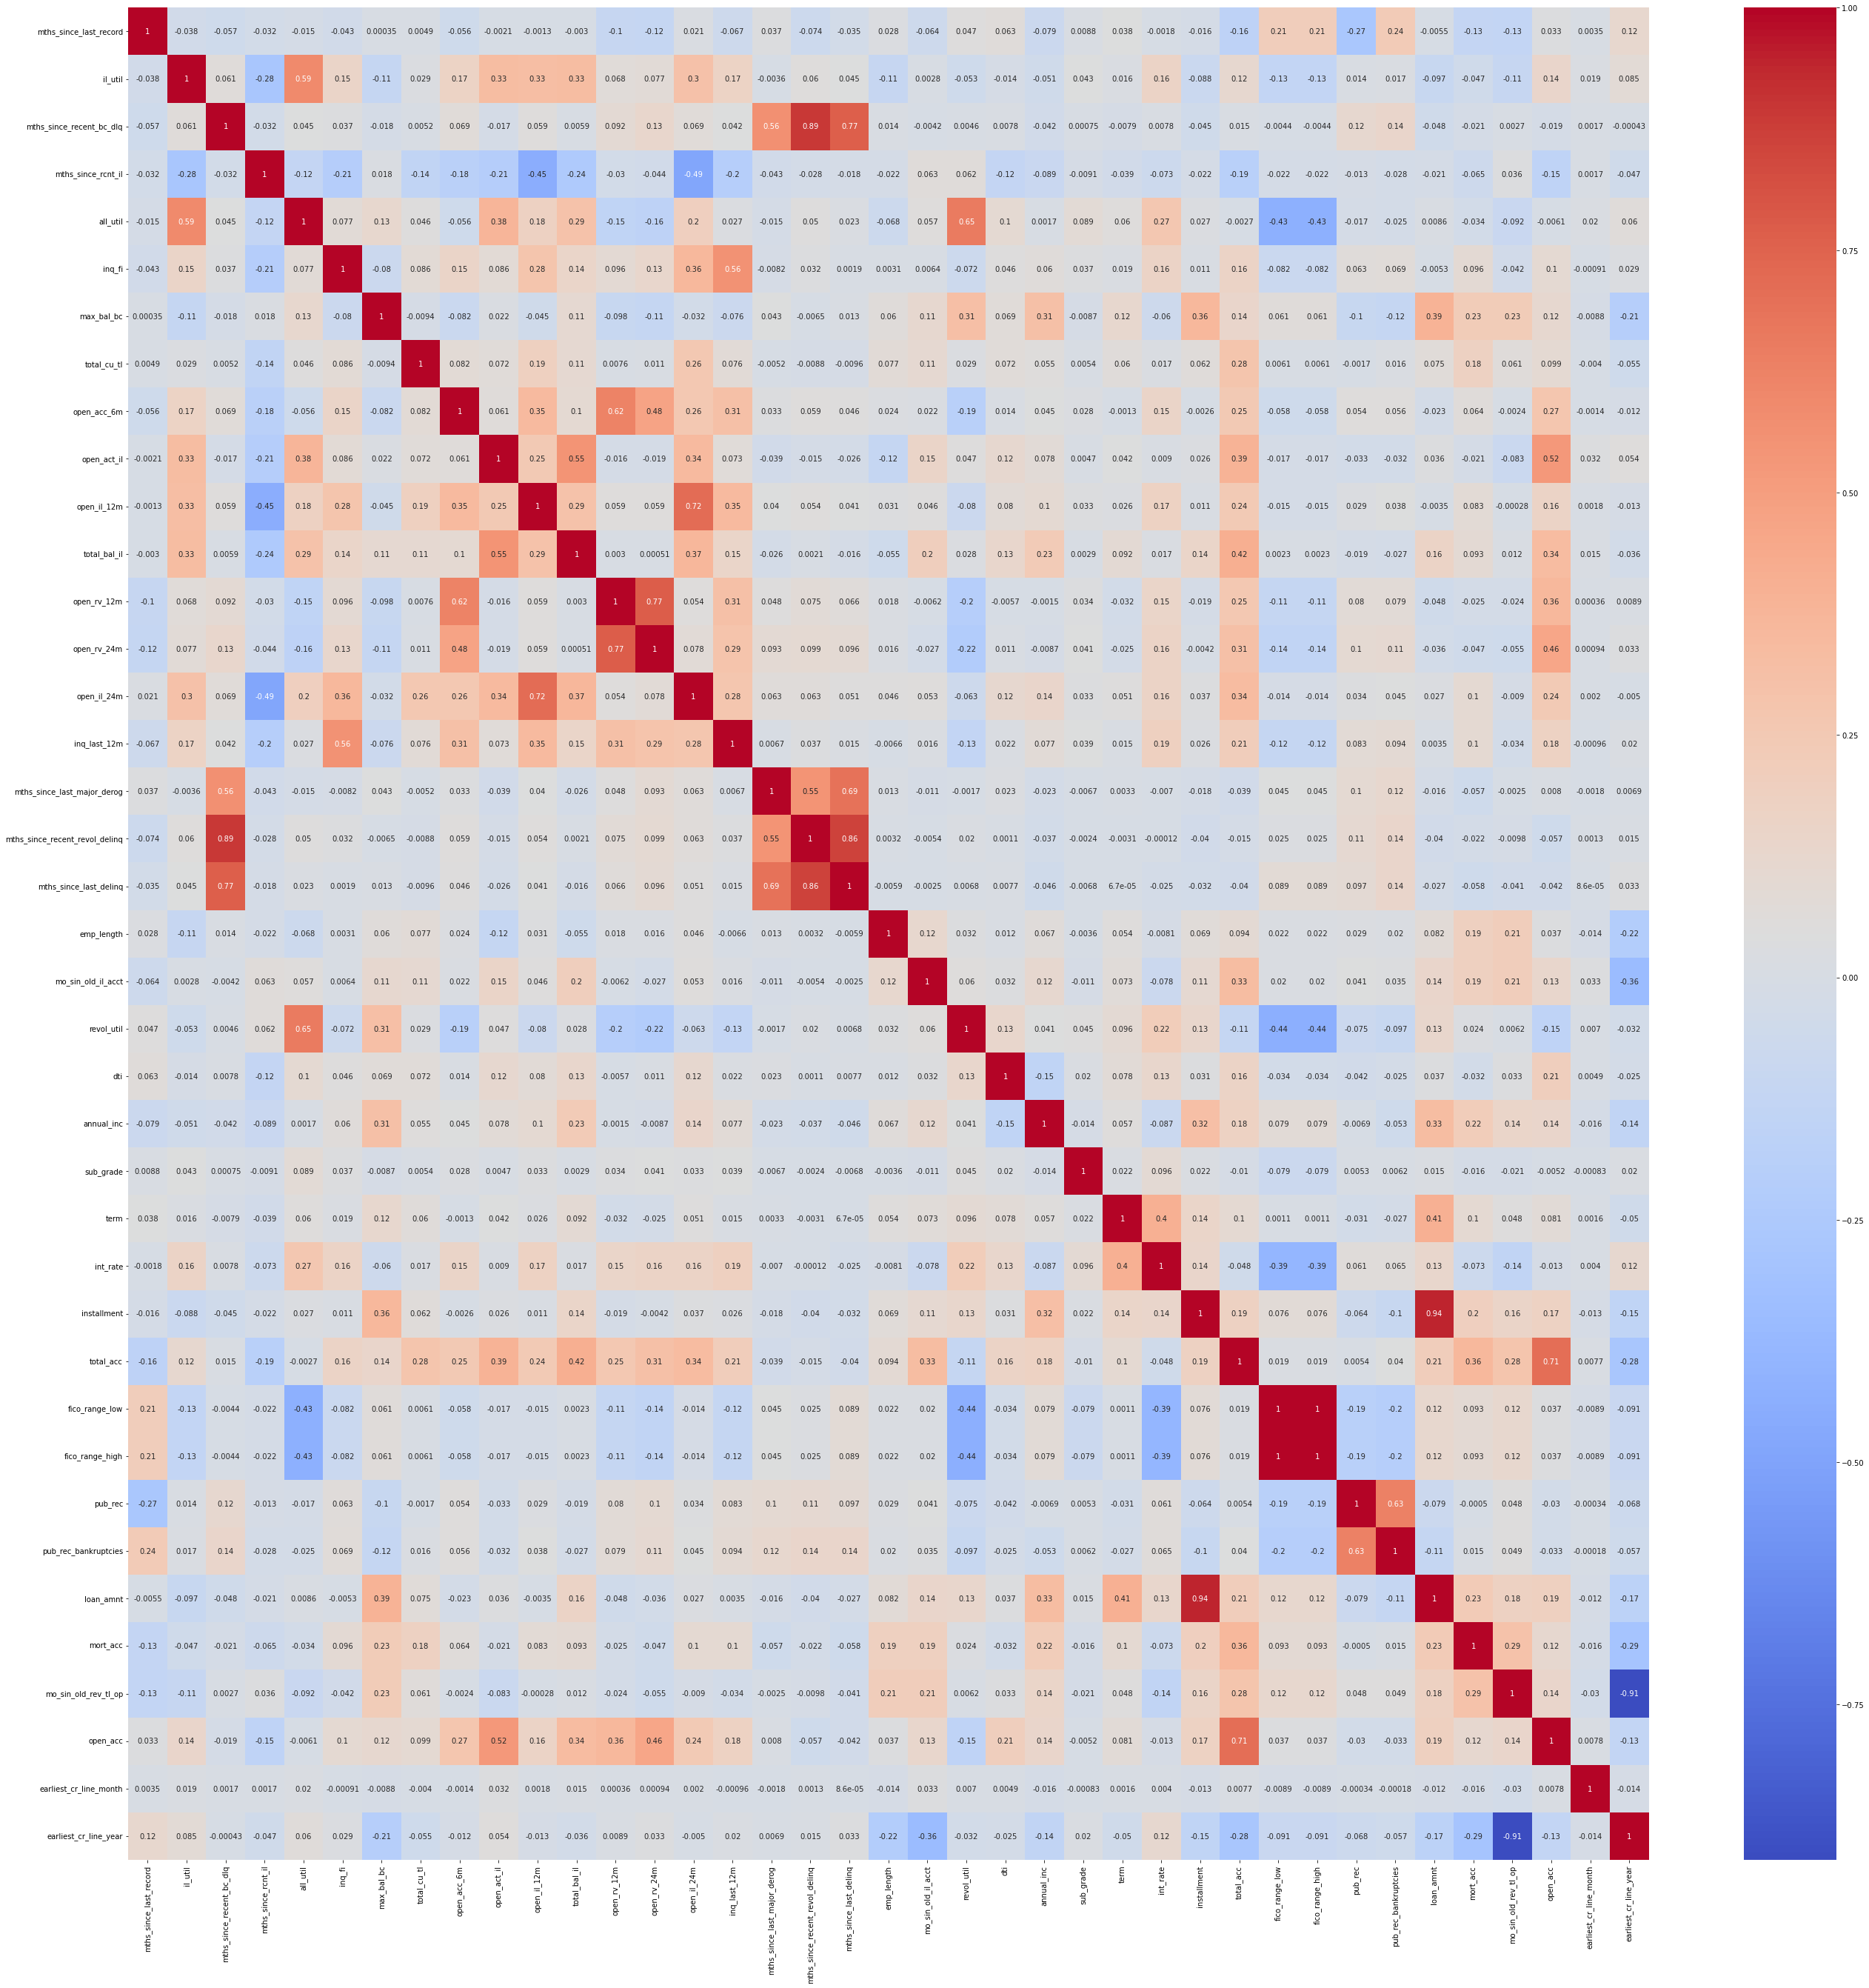

In [248]:
plt.figure(figsize=(46,46))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

Se podría eliminar una de las dos variables que tienen uno de correlacion entre ellas (fico_range_low,fico_range_high), pero más adelante no saldrán significativas para ninguno de los modelos, por lo que no vemos necesario retirar ninguna ahora.

### 2. Imputación de missings


Como se vio en el descriptivo, hay variables con valores nulos. En esta  parte analizaremos las variables una por una, decidiremos qué método de imputación de missings se adapta mejor a cada una de ellas y lo aplicaremos.

Para empezar, recordemos qué forma tienen los datos en nuestras variables y el número de valores nulos que había en cada una de ellas.

In [249]:
data.describe().T

count          mean           std      min  \
mths_since_last_record          155100.0     69.193056     26.469788     0.00   
il_util                         216581.0     68.935964     24.314068     0.00   
mths_since_recent_bc_dlq        225433.0     39.128601     22.793945     0.00   
mths_since_rcnt_il              242771.0     21.216410     25.438466     0.00   
all_util                        249495.0     58.072703     20.934013     0.00   
inq_fi                          249522.0      0.985091      1.470835     0.00   
max_bal_bc                      249522.0   5746.216294   5503.680835     0.00   
total_cu_tl                     249522.0      1.448706      2.616486     0.00   
open_acc_6m                     249522.0      0.897468      1.106633     0.00   
open_act_il                     249522.0      2.880884      3.088795     0.00   
open_il_12m                     249522.0      0.635138      0.862522     0.00   
total_bal_il                    249522.0  36064.496349  44125.330489     0.00   
open_rv_12m                     249522.0      1.300979      1.500244     0.00   
open_rv_24m                     249522.0      2.801448      2.618940     0.00   
open_il_24m                     249522.0      1.547006      1.532556     0.00   
inq_last_12m                    249522.0      2.056360      2.344474     0.00   
mths_since_last_major_derog     251613.0     44.428925     22.381966     0.00   
mths_since_recent_revol_delinq  315833.0     35.274006     22.443466     0.00   
mths_since_last_delinq          453448.0     33.659136     21.904715     0.00   
emp_length                      833681.0      6.071244      3.584865     1.00   
mo_sin_old_il_acct              859260.0    127.252680     52.470806     0.00   
revol_util                      884385.0     52.960143     24.014469     0.00   
dti                             884613.0     18.903278     11.722345     0.00   
annual_inc                      884874.0  76978.094972  68577.533729     0.00   
sub_grade                       884874.0      2.982810      1.429335     1.00   
term                            884874.0     43.426142     11.094141    36.00   
int_rate                        884874.0     13.113823      4.611941     5.32   
installment                     884874.0    440.548639    254.920045    14.01   
total_acc                       884874.0     25.111471     12.021749     2.00   
fico_range_low                  884874.0    694.698754     30.936507   660.00   
fico_range_high                 884874.0    698.698881     30.937130   664.00   
pub_rec                         884874.0      0.226262      0.622786     0.00   
pub_rec_bankruptcies            884874.0      0.134489      0.380002     0.00   
loan_amnt                       884874.0  14975.032406   8804.488994  1000.00   
mort_acc                        884874.0      1.653560      1.980924     0.00   
mo_sin_old_rev_tl_op            884874.0    184.481938     95.629446     2.00   
open_acc                        884874.0     11.817685      5.584596     0.00   
earliest_cr_line_month          884874.0      6.751170      3.366213     1.00   
earliest_cr_line_year           884874.0   1998.594433      7.703754  1934.00   

                                     25%       50%       75%          max  
mths_since_last_record             51.00     69.00     88.00       121.00  
il_util                            54.00     71.00     86.00       464.00  
mths_since_recent_bc_dlq           20.00     37.00     58.00       195.00  
mths_since_rcnt_il                  7.00     14.00     24.00       433.00  
all_util                           44.00     59.00     73.00       211.00  
inq_fi                              0.00      0.00      1.00        27.00  
max_bal_bc                       2300.00   4396.50   7504.00    571793.00  
total_cu_tl                         0.00      0.00      2.00        71.00  
open_acc_6m                         0.00      1.00      1.00        16.00  
open_act_il                       

In [250]:
data.isna().sum()

mths_since_last_record            729774
il_util                           668293
mths_since_recent_bc_dlq          659441
mths_since_rcnt_il                642103
all_util                          635379
inq_fi                            635352
max_bal_bc                        635352
total_cu_tl                       635352
open_acc_6m                       635352
open_act_il                       635352
open_il_12m                       635352
total_bal_il                      635352
open_rv_12m                       635352
open_rv_24m                       635352
open_il_24m                       635352
inq_last_12m                      635352
mths_since_last_major_derog       633261
mths_since_recent_revol_delinq    569041
mths_since_last_delinq            431426
emp_length                         51193
mo_sin_old_il_acct                 25614
revol_util                           489
dti                                  261
verification_status                    0
annual_inc      

Observemos que tenemos muchísimos valores nulos, demasiado para poder eliminar todos los datos que con algún valor missing. Tendremos que imputarles un valor. Para comenzar hagamos unas observaciones:

1. La variable que más valores nulos tiene es mths_since_last_record. Observemos que al tener tal extrema cantidad de missings es probable que esos missings tengan significado. Puesto que esta variable indica los meses que han pasado desde el último registro público, no es descabellado pensar que un valor nulo en esta variable significa que nunca se ha realizado uno de estos registros. Lo que a la hora de imputarlo nos deja difrentes opciones: la primera, es darle una clase nueva que indique que no tiene valor, esto lo podríamos hacer dando un valor negativo o algo que no apareciera en los datos; la segunda opción es darle el valor máximo del conjunto de datos, puesto que el tiempo es lineal tiene sentido que si no se ha hecho nunca un registro la fecha del último registro será "anterior" al del más antiguo. Tras valorarlo, hemos pensado que lo mejor es una mezcla de ambas. Daremos el valor del máximo más 12 (los meses que hay en un año), de esa manera respetamos el significado de la variable y además podremos indentificar todos estos valores si es necesario. Cambiaremos la distribución de la variable con esta medida, pero esto era algo que iba a ocurrir de todas maneras aunque imputáramos la media o la mediana (probocaríamos leptocurtez en la distribución).

2. Observamos que la medida presentada anteriormente se puede utilizar en las siguientes variables por las razones expuestas arriba: mths_since_recent_bc_dlq, mths_since_rcnt_il, mths_since_last_major_derog, mths_since_recent_revol_delinq, mths_since_last_delinq y mo_sin_old_il_acct.

3. Observamos que hay muchos missings en unas variables que reflejan el número de algunas operaciones específicas realizadas por los usuarios. Éstas son: all_util, inq_fi, max_bal_bc, total_cu_tl, open_acc_6m, open_act_il, open_il_12m, total_bal_il, open_rv_12m, open_rv_24m, open_il_24m, inq_last_12m. Todas con el mismo número de missings: 635352. Esto podría ser por un error en la recogida de los datos, pero todo apunta a que estos usuarios simplemente no realizan esta clase de operaciones. Por lo que lo más lógico sería imputar estos missings con el valor 0 en vez de con la media o la moda. Y, de hecho, eso haremos.

4. La variable il_util, merece un apartado a parte. Esto va a ser así por la importancia que tiene esta variable en lo que normalmente se llama credit score (que es básicamente, cuán fiable se es para devolver un préstamo). Esta variable refleja la tasa de utilización general y significa que los saldos de las tarjetas de crédito son demasiado altos. La tasa de utilización simplemente compara sus saldos generales en sus tarjetas de crédito con los límites de crédito generales. Como decíamos la tasa de utilización es el segundo factor más importante en la calificación crediticia solo detrás de los pagos atrasados. La tasa de utilización generalmente representa alrededor del 30 por ciento del puntaje de crédito total. Por lo tanto, observemos que estos valores missings, en realidad podrían presentar significado. Estos valores podrían ser faltantes por dos motivos: porque los usuarios no tengan un límite de crédito o porque no lo hayan pedido nunca. El primer caso es poco probable, pues raramente un banco no pone límite de crédito y, el segundo, es una buena señal, pues significa que el usuario no ha necesitado nunca pedir crédito por lo que lo juicioso sería darles a estos usuarios la máxima puntuación, que, en este caso sería el 0%.

5. Pasemos a la variable emp_length. Esta refleja el tiempo que ha estado el usuario trabajando en un trabajo. Como es una variable discreta entre 0 y 10 y el número de valores missings no es muy elevado los imputaremos por la moda. 

6. Por último tenemos las variables revol_util y dt con valores missings. Ambas variables son continuas y presentan muy pocos valores missings por lo que utilizaremos el método de KNN para imputar esos valores desconocidos. Cogeremos como número de vecinos al 0.0001% de los datos totales. Es decir, 88 vecinos.

In [251]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [252]:
#Imputación de missings correspondientes a los puntos 1 y 2.
data.fillna({'mths_since_last_record': data["mths_since_last_record"].max()+12}, inplace=True)
data.fillna({'mths_since_recent_bc_dlq': data["mths_since_recent_bc_dlq"].max()+12}, inplace=True)
data.fillna({'mths_since_rcnt_il': data["mths_since_rcnt_il"].max()+12}, inplace=True)
data.fillna({'mths_since_last_major_derog': data["mths_since_last_major_derog"].max()+12}, inplace=True)
data.fillna({'mths_since_recent_revol_delinq': data["mths_since_recent_revol_delinq"].max()+12}, inplace=True)
data.fillna({'mths_since_last_delinq': data["mths_since_last_delinq"].max()+12}, inplace=True)
data.fillna({'mo_sin_old_il_acct': data["mo_sin_old_il_acct"].max()+12}, inplace=True)

In [253]:
#Imputación de missings correspondientes a los puntos 3 y 4.
data.fillna({'all_util': 0}, inplace=True)
data.fillna({'inq_fi': 0}, inplace=True)
data.fillna({'max_bal_bc': 0}, inplace=True)
data.fillna({'total_cu_tl': 0}, inplace=True)
data.fillna({'open_acc_6m': 0}, inplace=True)
data.fillna({'open_act_il': 0}, inplace=True)
data.fillna({'open_il_12m': 0}, inplace=True)
data.fillna({'total_bal_il': 0}, inplace=True)
data.fillna({'open_rv_12m': 0}, inplace=True)
data.fillna({'open_rv_24m': 0}, inplace=True)
data.fillna({'open_il_24m': 0}, inplace=True)
data.fillna({'inq_last_12m': 0}, inplace=True)
data.fillna({'il_util': 0}, inplace=True)

In [254]:
#Imputación de missings correspondientes al punto 5.
si = SimpleImputer(strategy='most_frequent')
data["emp_length"] = si.fit_transform(data["emp_length"].values.reshape(-1, 1))

In [255]:
#Imputación de missings correspondientes al punto 6.
knn = KNNImputer(n_neighbors=88)
data["revol_util"] = knn.fit_transform(data["revol_util"].values.reshape(-1, 1))
data["dti"] = knn.fit_transform(data["dti"].values.reshape(-1, 1))

Comprobemos que hemos eliminado todos los missings y observemos la nueva estructura de los datos:

In [256]:
data.isna().sum()

mths_since_last_record            0
il_util                           0
mths_since_recent_bc_dlq          0
mths_since_rcnt_il                0
all_util                          0
inq_fi                            0
max_bal_bc                        0
total_cu_tl                       0
open_acc_6m                       0
open_act_il                       0
open_il_12m                       0
total_bal_il                      0
open_rv_12m                       0
open_rv_24m                       0
open_il_24m                       0
inq_last_12m                      0
mths_since_last_major_derog       0
mths_since_recent_revol_delinq    0
mths_since_last_delinq            0
emp_length                        0
mo_sin_old_il_acct                0
revol_util                        0
dti                               0
verification_status               0
annual_inc                        0
home_ownership                    0
sub_grade                         0
grade                       

In [257]:
data.describe().T

count          mean           std      min  \
mths_since_last_record          884874.0    121.815970     26.671062     0.00   
il_util                         884874.0     16.872707     31.986619     0.00   
mths_since_recent_bc_dlq        884874.0    164.232608     74.045548     0.00   
mths_since_rcnt_il              884874.0    328.732186    189.556766     0.00   
all_util                        884874.0     16.373912     28.396036     0.00   
inq_fi                          884874.0      0.277782      0.898060     0.00   
max_bal_bc                      884874.0   1620.352030   3902.157158     0.00   
total_cu_tl                     884874.0      0.408515      1.534732     0.00   
open_acc_6m                     884874.0      0.253073      0.713028     0.00   
open_act_il                     884874.0      0.812369      2.090627     0.00   
open_il_12m                     884874.0      0.179100      0.539868     0.00   
total_bal_il                    884874.0  10169.679817  28502.278991     0.00   
open_rv_12m                     884874.0      0.366858      0.988617     0.00   
open_rv_24m                     884874.0      0.789969      1.876992     0.00   
open_il_24m                     884874.0      0.436234      1.070917     0.00   
inq_last_12m                    884874.0      0.579864      1.551166     0.00   
mths_since_last_major_derog     884874.0    155.763527     71.186379     0.00   
mths_since_recent_revol_delinq  884874.0    136.060690     76.274043     0.00   
mths_since_last_delinq          884874.0    114.759692     84.610418     0.00   
emp_length                      884874.0      6.298536      3.598483     1.00   
mo_sin_old_il_acct              884874.0    152.834067    156.928613     0.00   
revol_util                      884874.0     52.960143     24.007833     0.00   
dti                             884874.0     18.903278     11.720616     0.00   
annual_inc                      884874.0  76978.094972  68577.533729     0.00   
sub_grade                       884874.0      2.982810      1.429335     1.00   
term                            884874.0     43.426142     11.094141    36.00   
int_rate                        884874.0     13.113823      4.611941     5.32   
installment                     884874.0    440.548639    254.920045    14.01   
total_acc                       884874.0     25.111471     12.021749     2.00   
fico_range_low                  884874.0    694.698754     30.936507   660.00   
fico_range_high                 884874.0    698.698881     30.937130   664.00   
pub_rec                         884874.0      0.226262      0.622786     0.00   
pub_rec_bankruptcies            884874.0      0.134489      0.380002     0.00   
loan_amnt                       884874.0  14975.032406   8804.488994  1000.00   
mort_acc                        884874.0      1.653560      1.980924     0.00   
mo_sin_old_rev_tl_op            884874.0    184.481938     95.629446     2.00   
open_acc                        884874.0     11.817685      5.584596     0.00   
earliest_cr_line_month          884874.0      6.751170      3.366213     1.00   
earliest_cr_line_year           884874.0   1998.594433      7.703754  1934.00   

                                     25%       50%       75%          max  
mths_since_last_record            133.00    133.00    133.00       133.00  
il_util                             0.00      0.00      0.00       464.00  
mths_since_recent_bc_dlq           80.00    207.00    207.00       207.00  
mths_since_rcnt_il                 48.00    445.00    445.00       445.00  
all_util                            0.00      0.00     32.00       211.00  
inq_fi                              0.00      0.00      0.00        27.00  
max_bal_bc                          0.00      0.00   1142.00    571793.00  
total_cu_tl                         0.00      0.00      0.00        71.00  
open_acc_6m                         0.00      0.00      0.00        16.00  
open_act_il                       

### 3. Transformación de variables


En este punto consideraremos a qué variables será necesario aplicar algún tipo de transformación, ya sean continuas o categóricas.

En primer lugar, vamos a agrupar las categorías de Loan_status que representen condiciones similares para optimizar el análisis supervisado. Lo haremos de dos formas, una dividiendo Loan_status en 4 categorías y otra (más adelante) dividiendolo en 2 categorías.

En la primera de las agrupaciones, loan_status pasará a tener 4 categorías, pues consideramos que para el objetivo de este estudio no se pierde información relevante y se agiliza el mismo:

* Current: Todos los pagos necesarios hasta la fecha han sido realizados
* Fully Paid: Crédito pagado
* Charged Off: Impagos (compuesta por Charged off y Default)
* Delays: Existen retrasos en el pago de los plazos establecidos en el préstamo (compuesta por Late (31-120 days), Late (16-30 days) e In Grace Period)


Antes de agrupar por las categorías comentadas, vamos a representarla para ver cómo se distribuían los datos con lo 7 valores posibles que puede adoptar la variable de primeras

<AxesSubplot:>

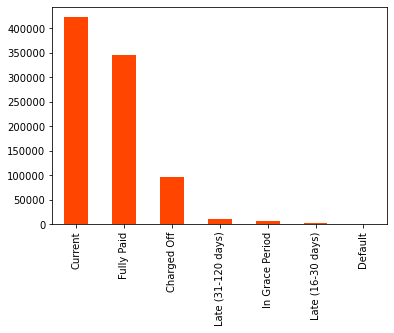

In [258]:
data['loan_status'].value_counts().plot(kind='bar',color = 'orangered',linewidth = 3)

Añadimos los valores de 'Default' a 'Charge Off' y los valores de 'Late (31-120 days)','Late (16-30 days)','In Grace Period' en una nueva llamada 'Delays' 

In [259]:
data['loan_status'] = data['loan_status'].replace('Default','Charged Off') 
data['loan_status'] = data['loan_status'].replace(['Late (31-120 days)','Late (16-30 days)','In Grace Period'],'Delays') 

Vemos que efectivamente, ahora en vez de poder tomar 7 valores, la variable objetivo 'loan_status' pasa a poder tomar 4. 

In [260]:
data['loan_status'].value_counts()

Current        422683
Fully Paid     345520
Charged Off     97081
Delays          19590
Name: loan_status, dtype: int64

<AxesSubplot:>

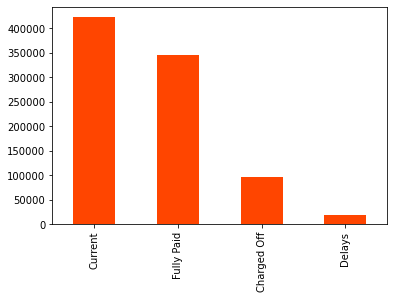

In [261]:
data['loan_status'].value_counts().plot(kind='bar',color = 'orangered',linewidth = 3)

Ahora transformamos la variable categórica home_ownership, que nos dice cuál es el estado de propiedad de la vivienda proporcionado por el prestatario durante el registro.

Los valores que de primeras puede tomar esta variable son: Mortage(hipoteca), rent(alquiler), own(propio), any y none. Vamos a representarla primero para ver cómo se distribuian los datos

In [262]:
data['home_ownership'].value_counts()

MORTGAGE    439599
RENT        350504
OWN          94752
ANY             16
NONE             3
Name: home_ownership, dtype: int64

<AxesSubplot:>

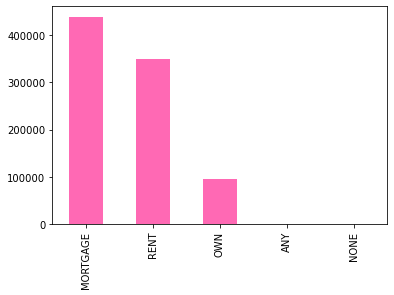

In [263]:
data['home_ownership'].value_counts().plot(kind='bar',color = 'hotpink',linewidth = 3)

Por la cantidad de datos que manejamos parece obvio que podemos eliminar las observaciones correspondientes a las categorías 'any' y 'none'.

In [264]:
data = data[(data['home_ownership']!='ANY')]
data = data[(data['home_ownership']!='NONE')]

Finalmente, representamos cómo es la variable con los 3 niveles posibles en vez de 5.

<AxesSubplot:>

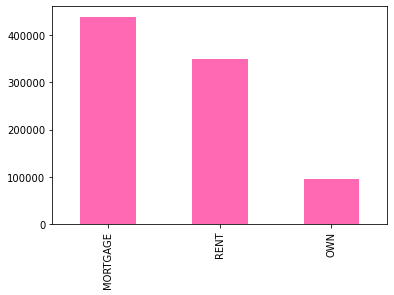

In [265]:
data['home_ownership'].value_counts().plot(kind='bar',color = 'hotpink',linewidth = 3)

Vamos a continuar nuestra transformación de variables con la variable  purpose,una variable que asigna a cada cliente una categoría proporcionada por el prestatario para la solicitud de préstamo. La representamos para ver cómo se distribuían los datos:

<AxesSubplot:>

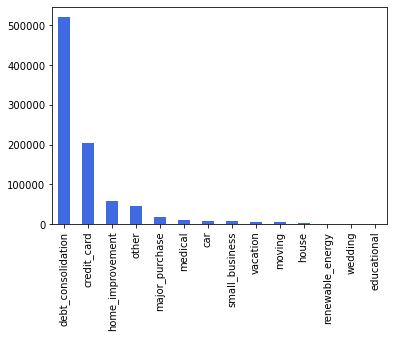

In [266]:
data['purpose'].value_counts().plot(kind='bar',color = 'royalblue',linewidth = 3)

In [267]:
data['purpose'].value_counts()

debt_consolidation    520839
credit_card           202692
home_improvement       57293
other                  45652
major_purchase         17048
medical                 9835
car                     8143
small_business          7940
vacation                5799
moving                  5788
house                   3318
renewable_energy         494
wedding                   13
educational                1
Name: purpose, dtype: int64

En este caso, simplemente incluiremos las categorías educational, wedding y renewable_energy en other para reducir el rango de la variable

In [268]:
data['purpose'] = data['purpose'].replace(['wedding','educational','renewable_energy'],'other') 

Finalmente, veamos cómo se distribujen los datos con las nuevas categorías

<AxesSubplot:>

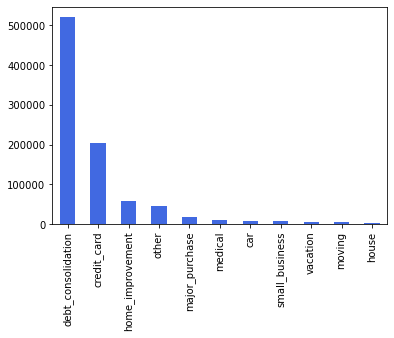

In [269]:
data['purpose'].value_counts().plot(kind='bar',color = 'royalblue',linewidth = 3)

Podriamos considerar la discretización de alguna variable continua del dataset como all_util o installment mediante KBinsDiscretizer. Pero observemos que todas las variables continuas es mejor que lo sigan siendo, pues ofrecen más y mejor información de las observaciones y si las discretizamos corremos el riesgo de perder explicabilidad y precisión en nuestras futuras predicciones.

En el descriptivo cuando analizabamos la distribución de los valores de la variable objetivo (Loan_status) nos quedó pendiente ver cómo se comportan algunas variables respecto a loan_status. Ahora que ya hemos tranformado las variables y hemos imputado missings nos parece adecuado verlo:

Esto es muy interesante ya que nos puede ayudar a hacernos una idea de cómo varía cada variable dependiendo de la categoria del loan_status

<AxesSubplot:xlabel='term', ylabel='count'>

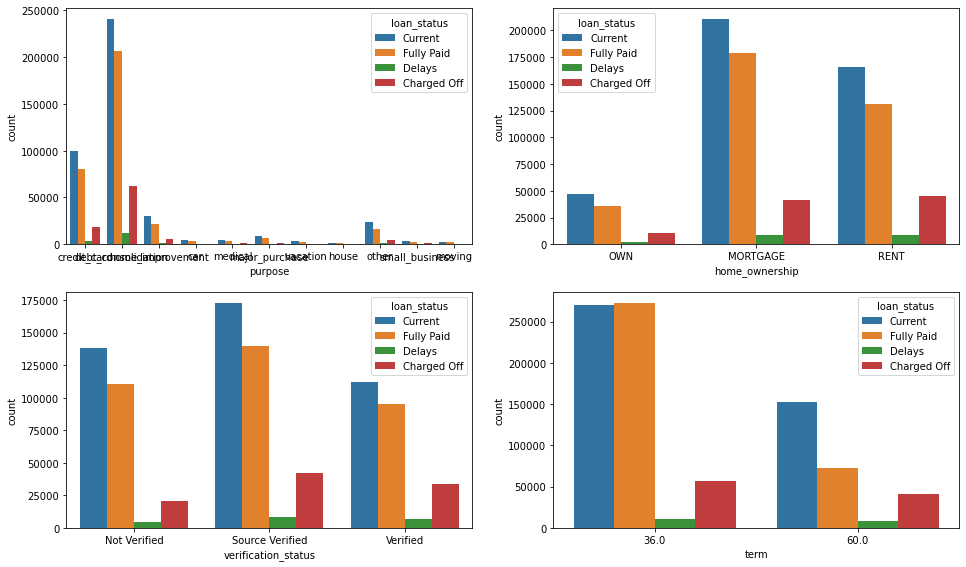

In [270]:
plt.figure(figsize=(16, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='purpose', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
sns.countplot(x='term', data=data, hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

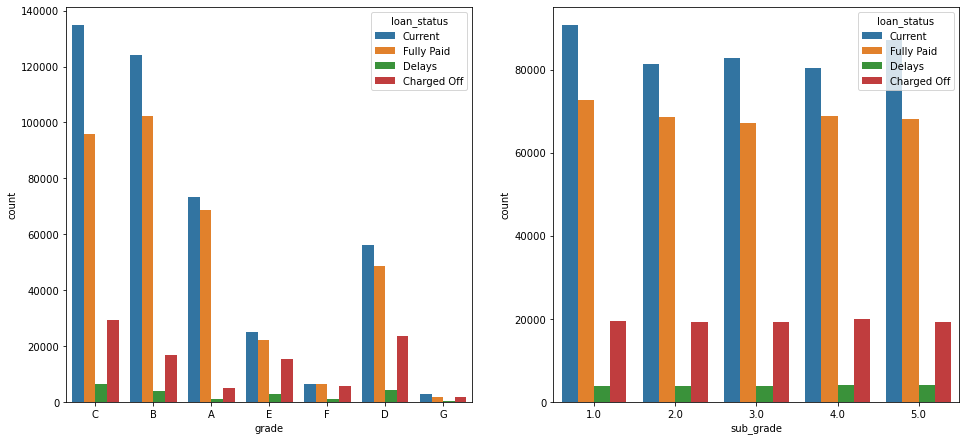

In [271]:
plt.figure(figsize=(16, 16))

plt.subplot(2, 2, 1)
sns.countplot(x='grade', data=data, hue='loan_status')

plt.subplot(2, 2, 2)
sns.countplot(x='sub_grade', data=data, hue='loan_status')

Con estos gráficos, ya podemos observar que existe mayor influencia de algunas variables en loan_status, como en grade en la que a medida que la nota es más baja, hay una mayor proporcion de Charged off. En cambio, en otras variables como en sub_grade, vemos una igual distribución de todos los niveles frente a loan_status.

Ahora, observando bien nuestra variable objetivo es posible que nuestras futuras predicciones sean mejores si consiguieramos que esta variable fuera binaria. Se nos ocurre de esta manera crear dos grupos: 'Fully Paid' que va a estar compuesto por aquellos que han pagado completamente su deuda y 'Morosos' que son aquellos que van tarde en su pago o directamente no lo han pagado. Con esto obtendremos dos grupos pero si nos damos cuenta la gente que aparece en current no va a entrar en ninguno de los dos grupos y, por lo tanto, vamos a eliminarla. Vamos a crear un dataset a parte para hacer predicciones posteriormente sobre ambos datasets. En uno intentaremos predecir sobre cuatro posibles grupos y en el segundo sobre sólo dos.

In [272]:
binary = data[(data['loan_status']!='Current')]
binary['loan_status'] = binary['loan_status'].replace(['Delays','Charged Off'],'Morosos') 

C:\Users\Usuario\AppData\Local\Temp/ipykernel_4464/2200361766.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [273]:
binary.describe().T

count          mean           std      min  \
mths_since_last_record          462189.0    121.026879     27.478210     0.00   
il_util                         462189.0      4.281664     17.956699     0.00   
mths_since_recent_bc_dlq        462189.0    163.092068     74.386132     0.00   
mths_since_rcnt_il              462189.0    416.729920    106.314730     0.00   
all_util                        462189.0      3.976970     15.757817     0.00   
inq_fi                          462189.0      0.080926      0.524640     0.00   
max_bal_bc                      462189.0    374.226760   1949.805539     0.00   
total_cu_tl                     462189.0      0.118899      0.883237     0.00   
open_acc_6m                     462189.0      0.075597      0.430046     0.00   
open_act_il                     462189.0      0.193851      1.061629     0.00   
open_il_12m                     462189.0      0.056635      0.335266     0.00   
total_bal_il                    462189.0   2512.600849  14566.523805     0.00   
open_rv_12m                     462189.0      0.101238      0.568409     0.00   
open_rv_24m                     462189.0      0.216569      1.095373     0.00   
open_il_24m                     462189.0      0.127500      0.654156     0.00   
inq_last_12m                    462189.0      0.174067      0.948860     0.00   
mths_since_last_major_derog     462189.0    154.187575     71.867337     0.00   
mths_since_recent_revol_delinq  462189.0    135.667017     76.118814     0.00   
mths_since_last_delinq          462189.0    114.554195     84.390179     0.00   
emp_length                      462189.0      6.303175      3.571160     1.00   
mo_sin_old_il_acct              462189.0    151.964742    155.992401     0.00   
revol_util                      462189.0     53.250013     23.857513     0.00   
dti                             462189.0     18.448899      8.827133     0.00   
annual_inc                      462189.0  75622.304908  66045.811149     0.00   
sub_grade                       462189.0      2.983998      1.421756     1.00   
term                            462189.0     42.322037     10.571707    36.00   
int_rate                        462189.0     13.347812      4.520135     5.32   
installment                     462189.0    441.384228    253.163197    14.01   
total_acc                       462189.0     25.990251     12.158852     2.00   
fico_range_low                  462189.0    692.877189     30.150247   660.00   
fico_range_high                 462189.0    696.877282     30.150718   664.00   
pub_rec                         462189.0      0.239108      0.633340     0.00   
pub_rec_bankruptcies            462189.0      0.147381      0.397081     0.00   
loan_amnt                       462189.0  14635.435720   8527.931794  1000.00   
mort_acc                        462189.0      1.760377      2.080504     0.00   
mo_sin_old_rev_tl_op            462189.0    182.172378     92.896538     3.00   
open_acc                        462189.0     11.809005      5.471931     0.00   
earliest_cr_line_month          462189.0      6.756859      3.368426     1.00   
earliest_cr_line_year           462189.0   1998.211478      7.473256  1944.00   

                                     25%       50%       75%         max  
mths_since_last_record            133.00    133.00    133.00      133.00  
il_util                             0.00      0.00      0.00      252.00  
mths_since_recent_bc_dlq           77.00    207.00    207.00      207.00  
mths_since_rcnt_il                445.00    445.00    445.00      445.00  
all_util                            0.00      0.00      0.00      152.00  
inq_fi                              0.00      0.00      0.00       27.00  
max_bal_bc                          0.00      0.00      0.00   127305.00  
total_cu_tl                         0.00      0.00      0.00       68.00  
open_acc_6m                         0.00      0.00      0.00       14.00  
open_act_il                         0.00    

In [274]:
binary['loan_status'].value_counts()

Fully Paid    345518
Morosos       116671
Name: loan_status, dtype: int64

<AxesSubplot:>

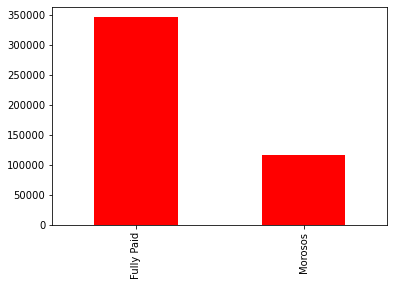

In [275]:
binary['loan_status'].value_counts().plot(kind='bar',color = 'red',linewidth = 3)

Hemos perdido muchísimas observaciones al hacer esto, pero creemos que en algunos métodos de predicción que haremos más adelante (regresión logística, por ejemplo) nos va a salir muy rentable y vamos a obtener predicciones más precisas.

Volvemos a hacer el análisis gráfico con este nuevo dataset.

<AxesSubplot:xlabel='term', ylabel='count'>

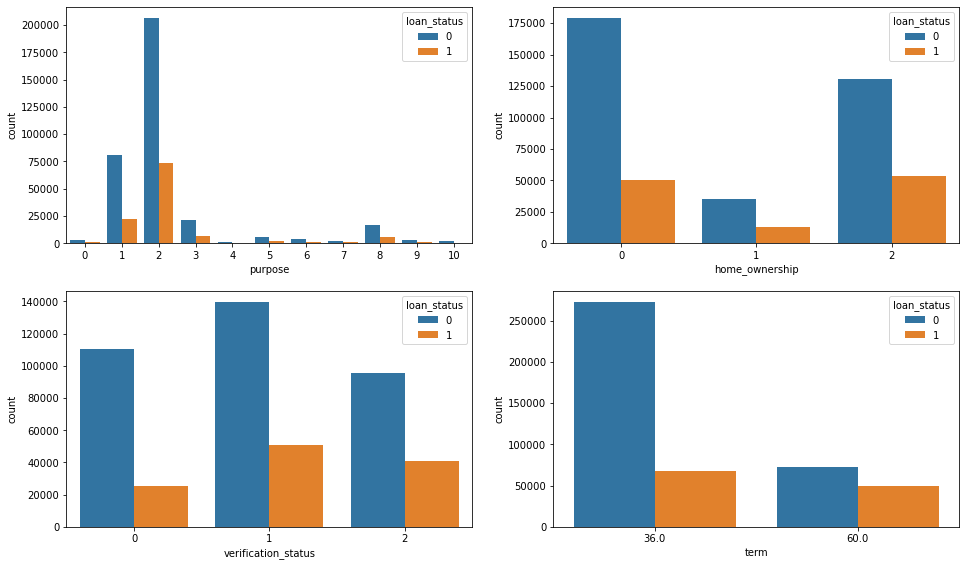

In [334]:
plt.figure(figsize=(16, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='purpose', data=binary, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=binary, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=binary, hue='loan_status')

plt.subplot(4, 2, 4)
sns.countplot(x='term', data=binary, hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

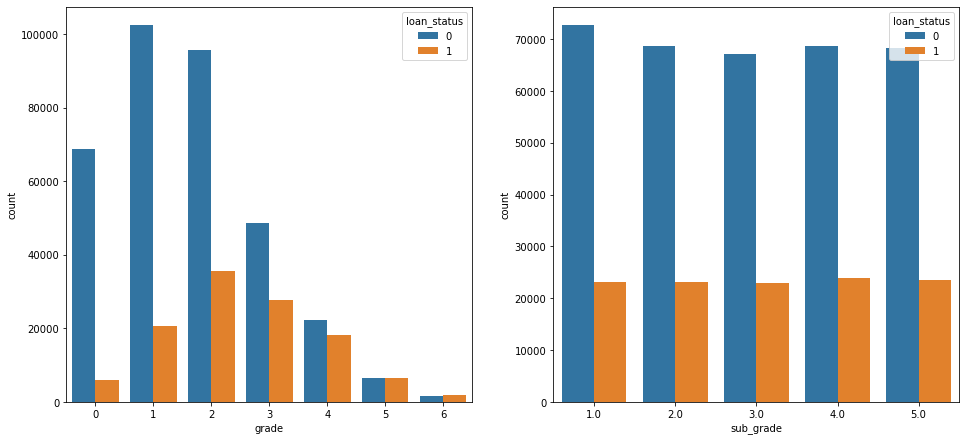

In [335]:
plt.figure(figsize=(16, 16))

plt.subplot(2, 2, 1)
sns.countplot(x='grade', data=binary, hue='loan_status')

plt.subplot(2, 2, 2)
sns.countplot(x='sub_grade', data=binary, hue='loan_status')

En este caso, se observa de forma aún más clara la importancia de algunas variables como grade y term respecto a loan_status.

Para terminar esta parte, vamos a codificar las variables categóricas. 

In [276]:
#Cargamos el nombre de las variables para poder identificar mejor la posición de las que codificaremos
data.columns

Index(['mths_since_last_record', 'il_util', 'mths_since_recent_bc_dlq',
       'mths_since_rcnt_il', 'all_util', 'inq_fi', 'max_bal_bc', 'total_cu_tl',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'total_bal_il',
       'open_rv_12m', 'open_rv_24m', 'open_il_24m', 'inq_last_12m',
       'mths_since_last_major_derog', 'mths_since_recent_revol_delinq',
       'mths_since_last_delinq', 'emp_length', 'mo_sin_old_il_acct',
       'revol_util', 'dti', 'verification_status', 'annual_inc',
       'home_ownership', 'sub_grade', 'grade', 'term', 'int_rate',
       'installment', 'loan_status', 'total_acc', 'purpose', 'addr_state',
       'fico_range_low', 'fico_range_high', 'initial_list_status',
       'application_type', 'pub_rec', 'pub_rec_bankruptcies', 'loan_amnt',
       'mort_acc', 'mo_sin_old_rev_tl_op', 'open_acc',
       'earliest_cr_line_month', 'earliest_cr_line_year'],
      dtype='object')

In [277]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()

#Aplicamos LabelEncoder al dataset con loan_status como variable binaria:
for i in binary.iloc[:,[23,25,27,31,33,34,37,38]]:
    binary[i]=binary[[i]].apply(LE.fit_transform)

C:\Users\Usuario\AppData\Local\Temp/ipykernel_4464/855675311.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [278]:
#Aplicamos LabelEncoder al dataset con loan_status como variable cualitativa de 4 niveles:
for i in data.iloc[:,[23,25,27,33,34,37,38]]:
    data[i]=data[[i]].apply(LE.fit_transform)

In [279]:
data['loan_status'].value_counts()

Current        422666
Fully Paid     345518
Charged Off     97081
Delays          19590
Name: loan_status, dtype: int64

In [280]:
# La variable objetivo la transformamos a mano para ordenar bien los valores
data['loan_status'] = data['loan_status'].replace(['Fully Paid'],0) 
data['loan_status'] = data['loan_status'].replace(['Current'],1/3) 
data['loan_status'] = data['loan_status'].replace(['Delays'],2/3) 
data['loan_status'] = data['loan_status'].replace(['Charged Off'],1) 

In [281]:
#Observamos el cambio
data['loan_status'].value_counts()

0.333333    422666
0.000000    345518
1.000000     97081
0.666667     19590
Name: loan_status, dtype: int64

De esta forma, todas las variables quedan como float o enteros

In [282]:
#Para comprobarlo:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884855 entries, 0 to 884881
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   mths_since_last_record          884855 non-null  float64
 1   il_util                         884855 non-null  float64
 2   mths_since_recent_bc_dlq        884855 non-null  float64
 3   mths_since_rcnt_il              884855 non-null  float64
 4   all_util                        884855 non-null  float64
 5   inq_fi                          884855 non-null  float64
 6   max_bal_bc                      884855 non-null  float64
 7   total_cu_tl                     884855 non-null  float64
 8   open_acc_6m                     884855 non-null  float64
 9   open_act_il                     884855 non-null  float64
 10  open_il_12m                     884855 non-null  float64
 11  total_bal_il                    884855 non-null  float64
 12  open_rv_12m     

### 4. Entrenamiento y test

En este apartado partiremos el conjunto de datos en un subconjunto de entrenamiento y otro de test.
Los datos de entrenamiento son los datos que usaremos para entrenar un modelo. La calidad de nuestro modelo de aprendizaje automático va a ser directamente proporcional a la calidad de los datos.
Los datos pertenecientes a test son los datos que nos “reservamos” para comprobar si el modelo que hemos generado a partir de los datos de entrenamiento “funciona”.
Para evitar errores por  un sobreajuste (o overfitting) o un subajuste (o underfitting) tenemos que conservar las proporciones originales de cada subconjunto de la variable objetivo loan_status.

-Estandarización

Como los valores que pueden tomar nuestras variables son muy diferentes entre si, creemos conveniente estandarizarlos. Hemos estandarizado al final ya que las otras partes del preprocessing no cambian aunque las variables no estuviesen estandarizadas (es decir la información, missings, outliers, correlaciones y distribuciones no cambian a pesar de que nuestros datos no estén estandarizados).

De nuevo, veamos que efectivamente medias y varianzas eran muy diferentes

In [283]:
data.describe().T

count          mean           std      min  \
mths_since_last_record          884855.0    121.816325     26.670521     0.00   
il_util                         884855.0     16.872336     31.986446     0.00   
mths_since_recent_bc_dlq        884855.0    164.232853     74.045397     0.00   
mths_since_rcnt_il              884855.0    328.736148    189.554966     0.00   
all_util                        884855.0     16.373288     28.395777     0.00   
inq_fi                          884855.0      0.277765      0.897998     0.00   
max_bal_bc                      884855.0   1620.281976   3902.080135     0.00   
total_cu_tl                     884855.0      0.408501      1.534706     0.00   
open_acc_6m                     884855.0      0.253061      0.713011     0.00   
open_act_il                     884855.0      0.812347      2.090614     0.00   
open_il_12m                     884855.0      0.179098      0.539868     0.00   
total_bal_il                    884855.0  10169.570930  28502.422092     0.00   
open_rv_12m                     884855.0      0.366839      0.988589     0.00   
open_rv_24m                     884855.0      0.789927      1.876952     0.00   
open_il_24m                     884855.0      0.436224      1.070911     0.00   
inq_last_12m                    884855.0      0.579846      1.551160     0.00   
mths_since_last_major_derog     884855.0    155.763602     71.186378     0.00   
mths_since_recent_revol_delinq  884855.0    136.060913     76.273987     0.00   
mths_since_last_delinq          884855.0    114.759912     84.610461     0.00   
emp_length                      884855.0      6.298530      3.598489     1.00   
mo_sin_old_il_acct              884855.0    152.832914    156.924625     0.00   
revol_util                      884855.0     52.960319     24.007949     0.00   
dti                             884855.0     18.903136     11.720077     0.00   
verification_status             884855.0      0.970910      0.767073     0.00   
annual_inc                      884855.0  76978.514433  68578.025104     0.00   
home_ownership                  884855.0      0.899311      0.939564     0.00   
sub_grade                       884855.0      2.982812      1.429332     1.00   
grade                           884855.0      1.777709      1.286886     0.00   
term                            884855.0     43.426139     11.094140    36.00   
int_rate                        884855.0     13.113808      4.611957     5.32   
installment                     884855.0    440.550180    254.919807    14.01   
loan_status                     884855.0      0.283696      0.303553     0.00   
total_acc                       884855.0     25.111644     12.021771     2.00   
purpose                         884855.0      2.387981      1.856606     0.00   
addr_state                      884855.0     23.269025     15.048725     0.00   
fico_range_low                  884855.0    694.698510     30.936411   660.00   
fico_range_high                 884855.0    698.698638     30.937033   664.00   
initial_list_status             884855.0      0.643023      0.479108     0.00   
application_type                884855.0      0.024090      0.153328     0.00   
pub_rec                         884855.0      0.226257      0.622786     0.00   
pub_rec_bankruptcies            884855.0      0.134488      0.380001     0.00   
loan_amnt                       884855.0  14975.084279   8804.483029  1000.00   
mort_acc                        884855.0      1.653569      1.980920     0.00   
mo_sin_old_rev_tl_op            884855.0    184.481590     95.629398     2.00   
open_acc                        884855.0     11.817743      5.584611     0.00   
earliest_cr_line_month          884855.0      6.751157      3.366211     1.00   
earliest_cr_line_year           884855.0   1998.594443      7.703747  1934.00   

                                     25%           50%           75%  \
mths_since_last_record            133.00    133.000000    133.000000   
il

In [284]:
from sklearn.preprocessing import StandardScaler
escala = StandardScaler()
a = escala.fit_transform(data.drop(['loan_status'],axis=1))
datastd = pd.DataFrame(a, columns= data.drop(['loan_status'],axis=1).columns)

In [285]:
datastd.describe().T

count          mean       std       min  \
mths_since_last_record          884855.0 -7.382946e-14  1.000001 -4.567455   
il_util                         884855.0 -3.165159e-12  1.000001 -0.527484   
mths_since_recent_bc_dlq        884855.0 -1.073373e-13  1.000001 -2.218003   
mths_since_rcnt_il              884855.0  3.822032e-12  1.000001 -1.734253   
all_util                        884855.0  1.671809e-12  1.000001 -0.576610   
inq_fi                          884855.0 -2.191089e-12  1.000001 -0.309316   
max_bal_bc                      884855.0 -4.384092e-12  1.000001 -0.415236   
total_cu_tl                     884855.0  9.470517e-13  1.000001 -0.266175   
open_acc_6m                     884855.0 -4.046280e-12  1.000001 -0.354919   
open_act_il                     884855.0 -3.159324e-12  1.000001 -0.388569   
open_il_12m                     884855.0  2.337545e-12  1.000001 -0.331745   
total_bal_il                    884855.0 -2.319498e-12  1.000001 -0.356797   
open_rv_12m                     884855.0 -1.383483e-12  1.000001 -0.371073   
open_rv_24m                     884855.0  3.502802e-12  1.000001 -0.420856   
open_il_24m                     884855.0 -1.320628e-12  1.000001 -0.407340   
inq_last_12m                    884855.0  1.828510e-13  1.000001 -0.373815   
mths_since_last_major_derog     884855.0  4.206110e-14  1.000001 -2.188111   
mths_since_recent_revol_delinq  884855.0  3.091432e-14  1.000001 -1.783845   
mths_since_last_delinq          884855.0 -1.247898e-14  1.000001 -1.356333   
emp_length                      884855.0  5.076336e-14  1.000001 -1.472433   
mo_sin_old_il_acct              884855.0  9.129813e-16  1.000001 -0.973926   
revol_util                      884855.0  7.500149e-16  1.000001 -2.205951   
dti                             884855.0 -7.721688e-16  1.000001 -1.612886   
verification_status             884855.0 -1.893786e-13  1.000001 -1.265735   
annual_inc                      884855.0 -1.872071e-15  1.000001 -1.122496   
home_ownership                  884855.0 -5.764053e-14  1.000001 -0.957158   
sub_grade                       884855.0  8.569913e-14  1.000001 -1.387231   
grade                           884855.0 -2.303966e-14  1.000001 -1.381404   
term                            884855.0 -5.961900e-14  1.000001 -0.669375   
int_rate                        884855.0  6.978617e-15  1.000001 -1.689914   
installment                     884855.0  3.134219e-15  1.000001 -1.673234   
total_acc                       884855.0  3.081891e-14  1.000001 -1.922484   
purpose                         884855.0 -3.375802e-13  1.000001 -1.286208   
addr_state                      884855.0  2.764258e-16  1.000001 -1.546246   
fico_range_low                  884855.0  1.660775e-14  1.000001 -1.121608   
fico_range_high                 884855.0  9.249947e-15  1.000001 -1.121590   
initial_list_status             884855.0  9.767892e-14  1.000001 -1.342125   
application_type                884855.0  2.190129e-12  1.000001 -0.157113   
pub_rec                         884855.0 -9.450828e-14  1.000001 -0.363299   
pub_rec_bankruptcies            884855.0  4.208379e-14  1.000001 -0.353914   
loan_amnt                       884855.0 -3.990348e-14  1.000001 -1.587270   
mort_acc                        884855.0 -1.422579e-13  1.000001 -0.834748   
mo_sin_old_rev_tl_op            884855.0 -2.904720e-15  1.000001 -1.908218   
open_acc                        884855.0  2.579761e-14  1.000001 -2.116128   
earliest_cr_line_month          884855.0  2.170188e-15  1.000001 -1.708497   
earliest_cr_line_year           884855.0  1.034149e-13  1.000001 -8.384813   

                                     25%       50%       75%         max  
mths_since_last_record          0.419327  0.419327  0.419327    0.419327  
il_util                        -0.527484 -0.527484 -0.527484   13.978668  
mths_since_recent_bc_dlq       -1.137585  0.577580  0.577580    0.577580  
mths_since_rcnt_il             -1.481028  0.613352  0.613352    0.61

Ya tenemos nuestros datos estandarizados.

Estandarizemos también sobre el dataset binary. Retiramos la variable loan_status antes de estandarizar y se introduce cuando el resto de datos estén estandarizados.

In [286]:
from sklearn.preprocessing import StandardScaler
escala = StandardScaler()
a = escala.fit_transform(binary.drop(['loan_status'],axis=1))
binarystd = pd.DataFrame(a, columns= binary.drop(['loan_status'],axis=1).columns)

Hay un problema con los indices si introdujera directamente loan_status en binarystd. Es por esto que vamos a crear un data frame auxilar con únicamente la variable loan_status y este será el que utilizaremos para meter la variable loan_status en el dataframe con los datos estandarizados. 


In [287]:
#Se crea el df
aux = pd.DataFrame(binary['loan_status'])
#Se resetean los índices para tenerlos de 0 a 462188 como en binarystd
aux.reset_index(inplace=True)

In [288]:
binarystd['loan_status']=aux['loan_status']

In [289]:
binarystd['loan_status']

0         0
1         0
2         0
3         0
4         0
         ..
462184    0
462185    1
462186    1
462187    1
462188    0
Name: loan_status, Length: 462189, dtype: int32

In [290]:
binarystd.describe().T

count          mean       std       min  \
mths_since_last_record          462189.0 -2.964725e-14  1.000001 -4.404472   
il_util                         462189.0 -5.165986e-13  1.000001 -0.238444   
mths_since_recent_bc_dlq        462189.0 -4.524584e-15  1.000001 -2.192509   
mths_since_rcnt_il              462189.0 -3.349535e-14  1.000001 -3.919780   
all_util                        462189.0 -1.422708e-12  1.000001 -0.252381   
inq_fi                          462189.0  6.643131e-13  1.000001 -0.154250   
max_bal_bc                      462189.0  9.761693e-13  1.000001 -0.191931   
total_cu_tl                     462189.0 -3.615052e-13  1.000001 -0.134618   
open_acc_6m                     462189.0 -7.890583e-13  1.000001 -0.175788   
open_act_il                     462189.0 -9.256231e-13  1.000001 -0.182598   
open_il_12m                     462189.0  6.554052e-13  1.000001 -0.168925   
total_bal_il                    462189.0 -3.139183e-13  1.000001 -0.172492   
open_rv_12m                     462189.0  6.165922e-13  1.000001 -0.178107   
open_rv_24m                     462189.0  7.014450e-13  1.000001 -0.197713   
open_il_24m                     462189.0  7.988209e-13  1.000001 -0.194908   
inq_last_12m                    462189.0  2.850941e-13  1.000001 -0.183449   
mths_since_last_major_derog     462189.0 -2.858127e-14  1.000001 -2.145449   
mths_since_recent_revol_delinq  462189.0  2.040538e-15  1.000001 -1.782308   
mths_since_last_delinq          462189.0 -2.158978e-15  1.000001 -1.357437   
emp_length                      462189.0  9.806094e-15  1.000001 -1.485002   
mo_sin_old_il_acct              462189.0  2.838207e-14  1.000001 -0.974181   
revol_util                      462189.0 -1.360043e-15  1.000001 -2.232004   
dti                             462189.0 -1.330791e-15  1.000001 -2.090024   
verification_status             462189.0 -1.039272e-13  1.000001 -1.306283   
annual_inc                      462189.0 -9.105839e-16  1.000001 -1.144999   
home_ownership                  462189.0  7.658003e-15  1.000001 -0.960018   
sub_grade                       462189.0  3.417007e-15  1.000001 -1.395458   
grade                           462189.0 -1.850138e-14  1.000001 -1.396410   
term                            462189.0  7.006530e-14  1.000001 -0.598015   
int_rate                        462189.0  1.285816e-14  1.000001 -1.776013   
installment                     462189.0 -1.496819e-15  1.000001 -1.688139   
total_acc                       462189.0  5.281080e-15  1.000001 -1.973071   
purpose                         462189.0  9.720242e-14  1.000001 -1.304056   
addr_state                      462189.0 -2.469030e-15  1.000001 -1.522967   
fico_range_low                  462189.0  5.016511e-15  1.000001 -1.090446   
fico_range_high                 462189.0 -7.227623e-15  1.000001 -1.090432   
initial_list_status             462189.0 -1.530589e-14  1.000001 -1.143090   
application_type                462189.0  1.889650e-13  1.000001 -0.059856   
pub_rec                         462189.0 -9.710181e-15  1.000001 -0.377535   
pub_rec_bankruptcies            462189.0  4.168185e-14  1.000001 -0.371162   
loan_amnt                       462189.0  9.065719e-15  1.000001 -1.598916   
mort_acc                        462189.0 -9.008222e-15  1.000001 -0.846131   
mo_sin_old_rev_tl_op            462189.0  5.417703e-17  1.000001 -1.928733   
open_acc                        462189.0  1.009349e-14  1.000001 -2.158108   
earliest_cr_line_month          462189.0 -9.106971e-16  1.000001 -1.709067   
earliest_cr_line_year           462189.0  8.320629e-15  1.000001 -7.254072   
loan_status                     462189.0  2.524314e-01  0.434408  0.000000   

                                     25%       50%       75%         max  
mths_since_last_record          0.435732  0.435732  0.435732    0.435732  
il_util                        -0.238444 -0.238444 -0.238444   13.795331  
mths_since_recent_bc_dlq       -1.157368  0.590271  0.590271    0

Hagamos train y test

In [337]:
data_loan_status = data['loan_status']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

data_loan_status_conteo =data['loan_status'].value_counts().reset_index()
data_loan_status_pc = pd.merge(data_loan_status, 
                                  data_loan_status_conteo, on=['index'], how='inner')


fig = px.histogram(data_loan_status_pc, x="index", y=['percent'])
fig.show()

In [292]:
from sklearn.model_selection import train_test_split
X_data, X_data_test, y_data, y_data_test = train_test_split(data.drop('loan_status',axis=1), 
                                                                     data['loan_status'], 
                                                                     stratify=data['loan_status'], 
                                                                     test_size=0.2)
data_train = pd.concat([X_data, y_data],axis=1)
data_test = pd.concat([X_data_test, y_data_test],axis=1)

In [293]:
print('== Train\n', data_train['loan_status'].value_counts(normalize=True))
print('== Test\n', data_test['loan_status'].value_counts(normalize=True))

== Train
 0.333333    0.477667
0.000000    0.390479
1.000000    0.109714
0.666667    0.022139
Name: loan_status, dtype: float64
== Test
 0.333333    0.477666
0.000000    0.390482
1.000000    0.109713
0.666667    0.022139
Name: loan_status, dtype: float64


Hagamos lo mismo ahora, para el nuevo dataset binary

In [294]:
binary_loan_status = binary['loan_status']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

binary_loan_status_conteo =binary['loan_status'].value_counts().reset_index()
binary_loan_status_pc = pd.merge(binary_loan_status, 
                                  binary_loan_status_conteo, on=['index'], how='inner')

fig = px.histogram(binary_loan_status_pc, x="index", y=['percent'])
fig.show()

In [295]:
from sklearn.model_selection import train_test_split
X_binary, X_binary_test, y_binary, y_binary_test = train_test_split(binary.drop('loan_status',axis=1), 
                                                                     binary['loan_status'], 
                                                                     stratify=binary['loan_status'], 
                                                                     test_size=0.2)
binary_train = pd.concat([X_binary, y_binary],axis=1)
binary_test = pd.concat([X_binary_test, y_binary_test],axis=1)

In [296]:
print('== Train\n', binary_train['loan_status'].value_counts(normalize=True))
print('== Test\n', binary_test['loan_status'].value_counts(normalize=True))

== Train
 0    0.747568
1    0.252432
Name: loan_status, dtype: float64
== Test
 0    0.747571
1    0.252429
Name: loan_status, dtype: float64


Ahora lo hacemos para binarystd

In [297]:
binarystd_loan_status = binarystd['loan_status']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

binarystd_loan_status_conteo =binarystd['loan_status'].value_counts().reset_index()
binarystd_loan_status_pc = pd.merge(binarystd_loan_status, 
                                  binarystd_loan_status_conteo, on=['index'], how='inner')

fig = px.histogram(binarystd_loan_status_pc, x="index", y=['percent'])
fig.show()

In [298]:
from sklearn.model_selection import train_test_split
X_binarystd, X_binarystd_test, y_binarystd, y_binarystd_test = train_test_split(binarystd.drop('loan_status',axis=1), 
                                                                     binarystd['loan_status'], 
                                                                     stratify=binarystd['loan_status'], 
                                                                     test_size=0.2)
binarystd_train = pd.concat([X_binarystd, y_binarystd],axis=1)
binarystd_test = pd.concat([X_binarystd_test, y_binarystd_test],axis=1)

In [299]:
print('== Train\n', binarystd_train['loan_status'].value_counts(normalize=True))
print('== Test\n', binarystd_test['loan_status'].value_counts(normalize=True))

== Train
 0    0.747568
1    0.252432
Name: loan_status, dtype: float64
== Test
 0    0.747571
1    0.252429
Name: loan_status, dtype: float64


### 5. Algoritmos de clasificación

Para valorar el rendimiento en clasificación de nuestros modelos, utilizaremos el siguiente conjunto de métricas:
* Accuracy: Mide el porcentaje de casos que el modelo ha acertado
* Recall (Sensitivity): Mide la cantidad de casos que es capaz de identificar el modelo
* Precision: Mide la calidad del modelo a la hora de clasificar, en nuestro caso, el porcentaje de clientes que no pagarán entre los que predice como no pagadores.
* Specificity: Mide la capacidad de nuestro modelo para dar como casos negativos los casos realmente positivos
* F1: El valor F1 se utiliza para combinar las medidas de precision y recall en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones.
* Confusion matrix: Matriz que indica por grupos el número de aciertos y fallos de los modelos de clasificación.
* Curva ROC: Representación gráfica de la sensibilidad frente a la especificidad para un sistema clasificador binario según se varía el umbral de discriminación.
* Área bajo la curva ROC: Esta área posee un valor comprendido entre 0,5 y 1, donde 1 representa un valor diagnóstico perfecto y 0,5 es una prueba sin capacidad discriminatoria diagnóstica.

In [300]:
#Introducimos una funcion que más adelante nos calcule las distintas métricas
def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()

    acc = (tp+tn)/(tn + fp + fn + tp) #Accuracy
    sen = tp/(tp+fn) #Recall
    esp = tn/(tn+fp) #Specificity
    ppv = tp/(tp+fp) #Precision
    fsc = 2*(sen*ppv/(sen+ppv)) #F1

    print('Accuracy: ', acc)
    print('Recall (Sensitivity): ', sen)
    print('Specificity: ', esp)
    print('Precision: ', ppv)
    print('F1: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1, 6], [1, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()

In [301]:
#Funcion para representar las matrices de confusion

from matplotlib.colors import ListedColormap
%matplotlib inline
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

A pesar de estar planteado como el último punto de la práctica (7), nos parece de gran ayuda para la construcción de los modelos, realizar el análisis de importancia de las variables ahora.

#### 5.0 Análisis de importancia (7)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



mths_since_last_record [0], Score: 0.01650
il_util [1], Score: 0.12390
mths_since_recent_bc_dlq [2], Score: 0.01917
mths_since_rcnt_il [3], Score: 0.45018
all_util [4], Score: -0.33642
inq_fi [5], Score: -0.01183
max_bal_bc [6], Score: 0.03951
total_cu_tl [7], Score: 0.03757
open_acc_6m [8], Score: -0.01986
open_act_il [9], Score: 0.01745
open_il_12m [10], Score: 0.00540
total_bal_il [11], Score: 0.01607
open_rv_12m [12], Score: -0.00621
open_rv_24m [13], Score: -0.04685
open_il_24m [14], Score: 0.01453
inq_last_12m [15], Score: -0.01454
mths_since_last_major_derog [16], Score: 0.01613
mths_since_recent_revol_delinq [17], Score: -0.00964
mths_since_last_delinq [18], Score: 0.04189
emp_length [19], Score: -0.01558
mo_sin_old_il_acct [20], Score: -0.05487
revol_util [21], Score: -0.04076
dti [22], Score: -0.18434
verification_status [23], Score: -0.04270
annual_inc [24], Score: 0.01745
home_ownership [25], Score: -0.07408
sub_grade [26], Score: -0.29482
grade [27], Score: -1.38396
term [

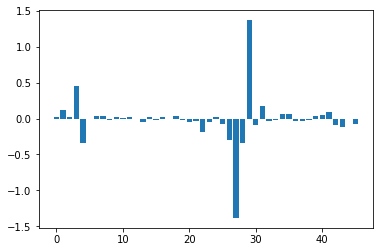

In [302]:
# logistic regression for feature importance of data
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X=datastd
y=data["loan_status"]*3 + 1 # define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
column = datastd.columns
for i,v in enumerate(importance):
	print(str(column[i]) + ' [%0d], Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

mths_since_last_record [0], Score: 0.00963
il_util [1], Score: -0.04558
mths_since_recent_bc_dlq [2], Score: -0.04442
mths_since_rcnt_il [3], Score: -0.06746
all_util [4], Score: 0.15184
inq_fi [5], Score: 0.00860
max_bal_bc [6], Score: -0.02673
total_cu_tl [7], Score: -0.02756
open_acc_6m [8], Score: 0.00955
open_act_il [9], Score: -0.01081
open_il_12m [10], Score: -0.01221
total_bal_il [11], Score: -0.00640
open_rv_12m [12], Score: -0.00751
open_rv_24m [13], Score: 0.00250
open_il_24m [14], Score: -0.00809
inq_last_12m [15], Score: 0.01086
mths_since_last_major_derog [16], Score: -0.02015
mths_since_recent_revol_delinq [17], Score: 0.03114
mths_since_last_delinq [18], Score: -0.01511
emp_length [19], Score: 0.01584
mo_sin_old_il_acct [20], Score: 0.02807
revol_util [21], Score: -0.00288
dti [22], Score: 0.20214
verification_status [23], Score: 0.06861
annual_inc [24], Score: -0.06282
home_ownership [25], Score: 0.13002
sub_grade [26], Score: 0.28319
grade [27], Score: 1.35217
term [2

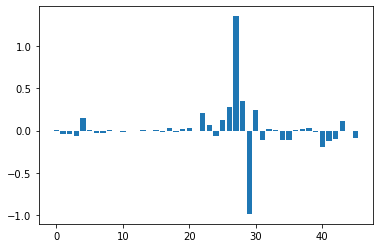

In [338]:
# logistic regression for feature importance of binary
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X=binarystd.drop(['loan_status'],axis=1)
y=binary["loan_status"]*3 + 1 # define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
column = binarystd.columns
for i,v in enumerate(importance):
	print(str(column[i]) + ' [%0d], Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Es claro en ambos datasets que las dos variables más importantes van a ser Grade e Int_rate, las tendremos en cuenta para los futuros algoritmos. También hay otras con un alto nivel de importancia como Term, Sub_grade, Installment, dti o loan_amnt.

#### 5.1 Regresión logística

Puesto que nuestra variable a predecir es binaria (0 o 1) tal vez sería interesante realizar una regresión logística para ver si mejoramos la predicción.
La diferencia con la regresión lineal es que la regresión lineal proporciona una salida continua y la regrsión logística una salida discreta(el cliente va a pagar el crédito o va a tener problemas).

Primeramente, importamos las librerías

In [304]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols

In [305]:
binary.describe().T

count          mean           std      min  \
mths_since_last_record          462189.0    121.026879     27.478210     0.00   
il_util                         462189.0      4.281664     17.956699     0.00   
mths_since_recent_bc_dlq        462189.0    163.092068     74.386132     0.00   
mths_since_rcnt_il              462189.0    416.729920    106.314730     0.00   
all_util                        462189.0      3.976970     15.757817     0.00   
inq_fi                          462189.0      0.080926      0.524640     0.00   
max_bal_bc                      462189.0    374.226760   1949.805539     0.00   
total_cu_tl                     462189.0      0.118899      0.883237     0.00   
open_acc_6m                     462189.0      0.075597      0.430046     0.00   
open_act_il                     462189.0      0.193851      1.061629     0.00   
open_il_12m                     462189.0      0.056635      0.335266     0.00   
total_bal_il                    462189.0   2512.600849  14566.523805     0.00   
open_rv_12m                     462189.0      0.101238      0.568409     0.00   
open_rv_24m                     462189.0      0.216569      1.095373     0.00   
open_il_24m                     462189.0      0.127500      0.654156     0.00   
inq_last_12m                    462189.0      0.174067      0.948860     0.00   
mths_since_last_major_derog     462189.0    154.187575     71.867337     0.00   
mths_since_recent_revol_delinq  462189.0    135.667017     76.118814     0.00   
mths_since_last_delinq          462189.0    114.554195     84.390179     0.00   
emp_length                      462189.0      6.303175      3.571160     1.00   
mo_sin_old_il_acct              462189.0    151.964742    155.992401     0.00   
revol_util                      462189.0     53.250013     23.857513     0.00   
dti                             462189.0     18.448899      8.827133     0.00   
verification_status             462189.0      1.001318      0.766540     0.00   
annual_inc                      462189.0  75622.304908  66045.811149     0.00   
home_ownership                  462189.0      0.903948      0.941597     0.00   
sub_grade                       462189.0      2.983998      1.421756     1.00   
grade                           462189.0      1.865468      1.335905     0.00   
term                            462189.0     42.322037     10.571707    36.00   
int_rate                        462189.0     13.347812      4.520135     5.32   
installment                     462189.0    441.384228    253.163197    14.01   
loan_status                     462189.0      0.252431      0.434408     0.00   
total_acc                       462189.0     25.990251     12.158852     2.00   
purpose                         462189.0      2.356861      1.807333     0.00   
addr_state                      462189.0     23.109925     15.174298     0.00   
fico_range_low                  462189.0    692.877189     30.150247   660.00   
fico_range_high                 462189.0    696.877282     30.150718   664.00   
initial_list_status             462189.0      0.566472      0.495562     0.00   
application_type                462189.0      0.003570      0.059643     0.00   
pub_rec                         462189.0      0.239108      0.633340     0.00   
pub_rec_bankruptcies            462189.0      0.147381      0.397081     0.00   
loan_amnt                       462189.0  14635.435720   8527.931794  1000.00   
mort_acc                        462189.0      1.760377      2.080504     0.00   
mo_sin_old_rev_tl_op            462189.0    182.172378     92.896538     3.00   
open_acc                        462189.0     11.809005      5.471931     0.00   
earliest_cr_line_month          462189.0      6.756859      3.368426     1.00   
earliest_cr_line_year           462189.0   1998.211478      7.473256  1944.00   

                                     25%       50%       75%         max  
mths_since_last_record            133.00    133.00    133.00      133.0

Para ver gráficamente cómo funciona y entender bien la regresión logística haremos una con una sóla variable (Grade).

In [306]:
logit_model = logit('loan_status ~ grade',binary).fit()

Optimization terminated successfully.
         Current function value: 0.526763
         Iterations 6


In [307]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:               462189
Model:                          Logit   Df Residuals:                   462187
Method:                           MLE   Df Model:                            1
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                 0.06766
Time:                        16:28:38   Log-Likelihood:            -2.4346e+05
converged:                       True   LL-Null:                   -2.6113e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0767      0.007   -301.290      0.000      -2.090      -2.063
grade          0.4815      0.003    180.670      0.000       0.476       0.487
==============================================================================
"""

In [308]:
# calculate predicted failure probabilities for new clients
x = np.linspace(0, 2700, 1000)
p = logit_model.params
eta = p['Intercept'] + x*p['grade']
y = np.exp(eta)/(1 + np.exp(eta))

C:\Users\Usuario\AppData\Local\Temp/ipykernel_4464/3299089939.py:5: RuntimeWarning:

overflow encountered in exp

C:\Users\Usuario\AppData\Local\Temp/ipykernel_4464/3299089939.py:5: RuntimeWarning:

invalid value encountered in true_divide



(-0.1, 1.1)

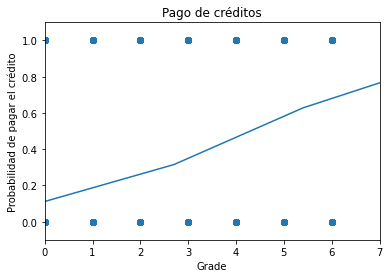

In [309]:
# plot data
temps, pfail = binary['grade'], binary['loan_status']
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Grade')
plt.ylabel('Probabilidad de pagar el crédito')
plt.title('Pago de créditos')

# plot fitted values
plt.plot(x, y)

# change limits, for a nicer plot
plt.xlim(0, 7)
plt.ylim(-0.1, 1.1)


Si observamos el coeficiente de grade (además de su p-valor), observamos que es positivo. Por lo que podemos decir que el aumento de la nota está asociado a un aumento de las probabilidades que tiene el cliente de tener problemas con el pago del crédito, lo que tiene mucho sentido por lo que representa la variable Grade.

Como sólo estamos haciendo el modelo para la variable grade estamos perdiendo exactitud en la predicción. Por lo que vamos a hacer una regresión logística múltiple para obtener mejores predicciones.

Importamos las librerías que vamos a necesitar

In [310]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [339]:
print("Número de observaciones por clase")
print(binary['loan_status'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * binary['loan_status'].value_counts(normalize=True))

Número de observaciones por clase
0    345518
1    116671
Name: loan_status, dtype: int64

Porcentaje de observaciones por clase
0    74.756864
1    25.243136
Name: loan_status, dtype: float64


Como se puede ver el 74.757% de los clientes no tienen problemas para devolver el crédito y el 25.243% tienen retrasos o directamente no lo pagan. Y, como ya hemos dicho un modelo de clasificación que sea útil debe de ser capaz de predecir correctamente un porcentaje de observaciones por encima del porcentaje de la clase mayoritaria. Por lo que el umbral de referencia que se tiene que superar es del 74.757%.

In [340]:
# Creación del modelo utilizando matrices como en scikitlearn
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_binary = sm.add_constant(X_binary, prepend=True)
modelo = sm.Logit(endog=y_binary, exog=X_binary,)
modelo = modelo.fit()
print(modelo.summary())

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Optimization terminated successfully.
         Current function value: 0.506434
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               369751
Model:                          Logit   Df Residuals:                   369704
Method:                           MLE   Df Model:                           46
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                  0.1036
Time:                        16:55:56   Log-Likelihood:            -1.8725e+05
converged:                       True   LL-Null:                   -2.0891e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             19.8420      3.449      5.753     

In [358]:
# Predicciones con intervalo de confianza 
predicciones = modelo.predict(exog = X_binary)
print(predicciones)

# Clasificación predicha
y_pred = np.where(predicciones<0.5, 0, 1)
print(y_pred)

716455    0.160272
364541    0.085552
256179    0.203542
239903    0.144558
515860    0.691661
            ...   
286845    0.602653
287498    0.251545
435246    0.455425
296132    0.060014
448622    0.111615
Length: 369751, dtype: float64
[0 0 0 ... 0 0 0]


In [360]:
# Accuracy de test del modelo 
X_binary_test = sm.add_constant(X_binary_test, prepend=True)
predicciones = modelo.predict(exog = X_binary_test)
y_pred = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(y_true = y_binary_test, y_pred = y_pred, normalize = True)
print(f"Acertamos el {100*accuracy}% de las predicciones")

Acertamos el 75.83894069538502% de las predicciones


C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



##### Métricas

In [363]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true = y_binary_test, y_pred = y_pred)
confmat

array([[65856,  3248],
       [19086,  4248]], dtype=int64)

Accuracy:  0.7583894069538502
Recall (Sensitivity):  0.18205194137310363
Specificity:  0.9529983792544571
Precision:  0.5667022411953042
F1:  0.2755757379176127


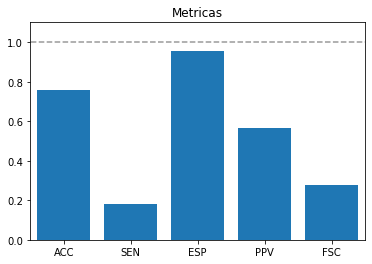

In [364]:
calcula_metricas(confmat)

Por último, calculamos el error cuadrático. Cuanto menos error, mejor.

In [315]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_binary_test, predicciones)

0.16662258744836303

Observamos que en nuestra predicción se acierta el 75.853%, que es superior al 74.757% obtenido antes, superando así el umbral de referencia. Por lo que nuestro modelo se puede considerar útil pues sabemos que a los clientes que nos diga el modelo van a pagar el crédito con gran probabilidad, pero aún así podemos intentar mejorarlo. Una forma es balanceando los datos eliminando observaciones de la parte mayoritaria. 

In [367]:
binary50 = binary.sort_values(by="loan_status")
binary50=binary50.drop(binary50.index[1:200000])

print("Número de observaciones por clase")
print(binary50['loan_status'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * binary50['loan_status'].value_counts(normalize=True))

Número de observaciones por clase
0    145519
1    116671
Name: loan_status, dtype: int64

Porcentaje de observaciones por clase
0    55.501354
1    44.498646
Name: loan_status, dtype: float64


In [368]:
from sklearn.model_selection import train_test_split
X_binary50, X_binary50_test, y_binary50, y_binary50_test = train_test_split(binary50.drop('loan_status',axis=1), 
                                                                     binary50['loan_status'], 
                                                                     stratify=binary50['loan_status'], 
                                                                     test_size=0.2)
binary50_train = pd.concat([X_binary50, y_binary50],axis=1)
binary50_test = pd.concat([X_binary50_test, y_binary50_test],axis=1)

In [369]:
print('== Train\n', binary50_train['loan_status'].value_counts(normalize=True))
print('== Test\n', binary50_test['loan_status'].value_counts(normalize=True))

== Train
 0    0.555013
1    0.444987
Name: loan_status, dtype: float64
== Test
 0    0.555017
1    0.444983
Name: loan_status, dtype: float64


De esta manera ahora tenemos el umbral de referencia en 55.5%, veremos a ver si esto mejora el modelo o no.

In [370]:
# Creación del modelo utilizando matrices como en scikitlearn
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_binary50 = sm.add_constant(X_binary50, prepend=True)
modelo = sm.Logit(endog=y_binary50, exog=X_binary50,)
modelo = modelo.fit()
print(modelo.summary())

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Optimization terminated successfully.
         Current function value: 0.576585
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               209752
Model:                          Logit   Df Residuals:                   209705
Method:                           MLE   Df Model:                           46
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                  0.1608
Time:                        17:13:35   Log-Likelihood:            -1.2094e+05
converged:                       True   LL-Null:                   -1.4412e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -33.5029      4.422     -7.576     

## COmpletar
Observemos que casi todas las variables tienen un p-valor muy por encima de 0.05, es decir, que no son significativas en el modelo. Crearemos después de probar el modelo balanceado un último modelo con únicamente las variables que nos han dado con un p-valor por debajo de 0.05. Estas son: 

In [371]:
# Predicciones con intervalo de confianza 
predicciones = modelo.predict(exog = X_binary50)
print(predicciones)

# Clasificación predicha
clasificacion = np.where(predicciones<0.5, 0, 1)
print(clasificacion)

542029    0.638831
362604    0.292494
785545    0.674402
338365    0.629720
599218    0.804877
            ...   
315955    0.278145
807326    0.652723
756230    0.713818
408077    0.134020
282723    0.335975
Length: 209752, dtype: float64
[1 0 1 ... 1 0 0]


In [372]:
# Accuracy de test del modelo 
X_binary50_test = sm.add_constant(X_binary50_test, prepend=True)
predicciones = modelo.predict(exog = X_binary50_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(y_true = y_binary50_test, y_pred = clasificacion, normalize = True)
print("")
print(f"Acertamos el {100*accuracy}% de las predicciones")


Acertamos el 70.1228117014379% de las predicciones


C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Veamos que tal funciona este modelo con nuestro dataset original

In [373]:
# Predicciones con intervalo de confianza 
predicciones = modelo.predict(exog = X_binary)
print(predicciones)

# Clasificación predicha
clasificacion = np.where(predicciones<0.5, 0, 1)
print(clasificacion)

716455    0.381209
364541    0.179327
256179    0.428713
239903    0.347188
515860    0.942724
            ...   
286845    0.812481
287498    0.528447
435246    0.599117
296132    0.149140
448622    0.245868
Length: 369751, dtype: float64
[0 0 0 ... 1 0 0]


In [374]:
# Accuracy de test del modelo 
X_binary_test = sm.add_constant(X_binary_test, prepend=True)
predicciones = modelo.predict(exog = X_binary_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(y_true = y_binary_test, y_pred = clasificacion, normalize = True)
print("")
print(f"Acertamos el {100*accuracy}% de las predicciones")


Acertamos el 67.2764447521582% de las predicciones


C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Parece que funciona peor que el primer modelo, confirmemoslo con el error cuadrático, si es mayor entonces confirmamos que el primer modelo da mejores resultados.

##### Métricas

In [375]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true = y_binary_test, y_pred = clasificacion)
confmat

array([[48046, 21058],
       [ 9191, 14143]], dtype=int64)

Accuracy:  0.672764447521582
Recall (Sensitivity):  0.6061112539641724
Specificity:  0.6952708960407502
Precision:  0.40177835856935884
F1:  0.4832322542068848


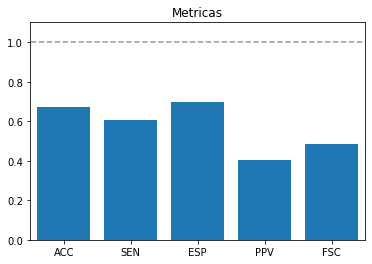

In [376]:
calcula_metricas(confmat)

In [324]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_binary_test, predicciones)

0.21167689053701444

Lo es, de momento nos quedaremos con el primer modelo y haremos el resto de mediciones sobre ese.

##### 5.1.2 Dataset data

In [377]:
data.describe().T

count          mean           std      min  \
mths_since_last_record          884855.0    121.816325     26.670521     0.00   
il_util                         884855.0     16.872336     31.986446     0.00   
mths_since_recent_bc_dlq        884855.0    164.232853     74.045397     0.00   
mths_since_rcnt_il              884855.0    328.736148    189.554966     0.00   
all_util                        884855.0     16.373288     28.395777     0.00   
inq_fi                          884855.0      0.277765      0.897998     0.00   
max_bal_bc                      884855.0   1620.281976   3902.080135     0.00   
total_cu_tl                     884855.0      0.408501      1.534706     0.00   
open_acc_6m                     884855.0      0.253061      0.713011     0.00   
open_act_il                     884855.0      0.812347      2.090614     0.00   
open_il_12m                     884855.0      0.179098      0.539868     0.00   
total_bal_il                    884855.0  10169.570930  28502.422092     0.00   
open_rv_12m                     884855.0      0.366839      0.988589     0.00   
open_rv_24m                     884855.0      0.789927      1.876952     0.00   
open_il_24m                     884855.0      0.436224      1.070911     0.00   
inq_last_12m                    884855.0      0.579846      1.551160     0.00   
mths_since_last_major_derog     884855.0    155.763602     71.186378     0.00   
mths_since_recent_revol_delinq  884855.0    136.060913     76.273987     0.00   
mths_since_last_delinq          884855.0    114.759912     84.610461     0.00   
emp_length                      884855.0      6.298530      3.598489     1.00   
mo_sin_old_il_acct              884855.0    152.832914    156.924625     0.00   
revol_util                      884855.0     52.960319     24.007949     0.00   
dti                             884855.0     18.903136     11.720077     0.00   
verification_status             884855.0      0.970910      0.767073     0.00   
annual_inc                      884855.0  76978.514433  68578.025104     0.00   
home_ownership                  884855.0      0.899311      0.939564     0.00   
sub_grade                       884855.0      2.982812      1.429332     1.00   
grade                           884855.0      1.777709      1.286886     0.00   
term                            884855.0     43.426139     11.094140    36.00   
int_rate                        884855.0     13.113808      4.611957     5.32   
installment                     884855.0    440.550180    254.919807    14.01   
loan_status                     884855.0      0.283696      0.303553     0.00   
total_acc                       884855.0     25.111644     12.021771     2.00   
purpose                         884855.0      2.387981      1.856606     0.00   
addr_state                      884855.0     23.269025     15.048725     0.00   
fico_range_low                  884855.0    694.698510     30.936411   660.00   
fico_range_high                 884855.0    698.698638     30.937033   664.00   
initial_list_status             884855.0      0.643023      0.479108     0.00   
application_type                884855.0      0.024090      0.153328     0.00   
pub_rec                         884855.0      0.226257      0.622786     0.00   
pub_rec_bankruptcies            884855.0      0.134488      0.380001     0.00   
loan_amnt                       884855.0  14975.084279   8804.483029  1000.00   
mort_acc                        884855.0      1.653569      1.980920     0.00   
mo_sin_old_rev_tl_op            884855.0    184.481590     95.629398     2.00   
open_acc                        884855.0     11.817743      5.584611     0.00   
earliest_cr_line_month          884855.0      6.751157      3.366211     1.00   
earliest_cr_line_year           884855.0   1998.594443      7.703747  1934.00   

                                     25%           50%           75%  \
mths_since_last_record            133.00    133.000000    133.000000   
il

Hagamos para comenzar uno bivariante para ver cómo va a funcionar, esta vez lo vamos a hacer con la variable int_rate.

In [378]:
logit_model = logit('loan_status ~ int_rate',data).fit()

Optimization terminated successfully.
         Current function value: 0.538165
         Iterations 5


In [379]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:               884855
Model:                          Logit   Df Residuals:                   884853
Method:                           MLE   Df Model:                            1
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                -0.06615
Time:                        17:14:30   Log-Likelihood:            -4.7620e+05
converged:                       True   LL-Null:                   -4.4665e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6794      0.007   -231.499      0.000      -1.694      -1.665
int_rate       0.0564      0.001    111.753      0.000       0.055       0.057
==============================================================================
"""

In [380]:
# calculate predicted failure probabilities for new clients
x = np.linspace(0, 2700, 1000)
p = logit_model.params
eta = p['Intercept'] + x*p['int_rate']
y = np.exp(eta)/(1 + np.exp(eta))

(-0.1, 1.1)

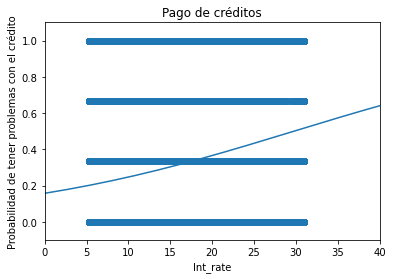

In [381]:
# plot data
temps, pfail = data['int_rate'], data['loan_status']
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Int_rate')
plt.ylabel('Probabilidad de tener problemas con el crédito')
plt.title('Pago de créditos')

# plot fitted values
plt.plot(x, y)

# change limits, for a nicer plot
plt.xlim(0, 40)
plt.ylim(-0.1, 1.1)


Si observamos el coeficiente de int_rate (además de su p-valor), observamos que es positivo. Por lo que podemos decir que el aumento de esta medida está asociado a un aumento de las probabilidades que tiene el cliente de tener problemas con el pago.

Pero como sólo estamos haciendo el modelo para la variable int_rate estamos perdiendo exactitud en la predicción. Por lo que vamos a hacer una regresión logística múltiple para obtener mejores predicciones.

In [382]:
print("Número de observaciones por clase")
print(data['loan_status'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * data['loan_status'].value_counts(normalize=True))

Número de observaciones por clase
0.333333    422666
0.000000    345518
1.000000     97081
0.666667     19590
Name: loan_status, dtype: int64

Porcentaje de observaciones por clase
0.333333    47.766696
0.000000    39.047980
1.000000    10.971402
0.666667     2.213922
Name: loan_status, dtype: float64


Como no tenemos una variable binaria ahora no podemos establecer un umbral de referencia como antes.

In [383]:
# Creación del modelo utilizando matrices como en scikitlearn
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_data = sm.add_constant(X_data, prepend=True)
modelo = sm.Logit(endog=y_data, exog=X_data,)
modelo = modelo.fit()
print(modelo.summary())

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Optimization terminated successfully.
         Current function value: 0.532816
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               707884
Model:                          Logit   Df Residuals:                   707837
Method:                           MLE   Df Model:                           46
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                -0.05555
Time:                        17:14:47   Log-Likelihood:            -3.7717e+05
converged:                       True   LL-Null:                   -3.5732e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.7701      2.036     -0.378     

In [384]:
# Predicciones con intervalo de confianza 
predicciones = modelo.predict(exog = X_data)
print(predicciones)

# Clasificación predicha
clasificacion3 = np.where(predicciones<1/6, 0, predicciones)
clasificacion2 = np.where((1/6<=clasificacion3) & (clasificacion3<1/2), 1/3, clasificacion3)
clasificacion1 = np.where((1/2<=clasificacion2) & (clasificacion2<5/6), 2/3, clasificacion2)
clasificacion = np.where(5/6<=clasificacion1, 1, clasificacion1)
clasificacion[0:50]

45556     0.367659
398153    0.155384
148743    0.299966
841697    0.160201
873515    0.277137
            ...   
708135    0.214520
222614    0.369940
245475    0.253744
845489    0.355581
419843    0.199503
Length: 707884, dtype: float64


array([0.33333333, 0.        , 0.33333333, 0.        , 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333])

In [391]:
# Accuracy de test del modelo 
X_data_test = sm.add_constant(X_data_test, prepend=True)
predicciones = modelo.predict(exog = X_data_test)
clasificacion3 = np.where(predicciones<1/6, 0, predicciones)
clasificacion2 = np.where((1/6<=clasificacion3) & (clasificacion3<1/2), 1/3, clasificacion3)
clasificacion1 = np.where((1/2<=clasificacion2) & (clasificacion2<5/6), 2/3, clasificacion2)
clasificacion = np.where(5/6<=clasificacion1, 1, clasificacion1)
accuracy = accuracy_score(y_true = y_data_test*3, y_pred = clasificacion*3, normalize = True)
print(f"Acertamos el {100*accuracy}% de las predicciones")

Acertamos el 51.218561233196404% de las predicciones


C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



##### Métricas

In [389]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true = y_data_test*3, y_pred = clasificacion*3)
confmat

array([[ 9029, 59581,   486,     8],
       [ 2092, 81516,   903,    22],
       [   21,  3801,    96,     0],
       [  497, 18325,   593,     1]], dtype=int64)

Por último, calculamos el error cuadrático. Cuanto menos error, mejor.

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_data_test, predicciones)

# KNN

Vamos a probar a aplicar el método KNN. Puede ser interesante al ser un modelo no paramétrico, aunque el coste computacional de estos modelos será mucho mayor. Esto hace que solo vayamos a aplicarlos sobre la base de datos de binary, ya que tiene la mitad de observaciones y así agilizaremos le proceso.

Cargamos las siguientes librerías para aplicar crossvalidation.

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

A la hora de aplicar el algoritmo KNN, es importante hacerlo sobre los datos estandarizados. El alto coste computacional de este método hace que sólo podamos crear modelos con una, dos o como máximo tres variables.

Es por esto, que comenzaremos aplicando el método knn sobre la variable int_rate

In [183]:
datos = binarystd[['int_rate']] #Metemos solo 1 variable al modelo.
X = np.array(datos)
y = binarystd['loan_status'].values

#Dividimos en entrenamiento y test el dataset binarystd solo con esta variable
X_training_knn_1 = X_binarystd[['int_rate']]
X_test_knn_1 = X_binarystd_test[['int_rate']]

In [184]:
#Con esto se definen los hiperparámetros de búsqueda
#Ponemos k en un rango corto por el costo computacional que supone ampliar el rango
ks = list(range(1, 20))

knn = KNeighborsClassifier()
h_parameters = {'n_neighbors':ks}

# Definimos la búsqueda + CV, con la métrica a optimizar
cv = GridSearchCV(knn, h_parameters, cv=5, n_jobs=1, scoring='accuracy')

cv.fit(X, y)

cv.best_estimator_

KNeighborsClassifier(n_neighbors=18)

Para KNN obtenemos de esta forma que el hiperparámetro k que mejor estime será = 10

Aplicamos por lo tanto knn con estos hiperparámetros

In [202]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_training_knn_1, y_binarystd)

y_pred = knn.predict(X_test_knn_1)

##### Matriz de confusión

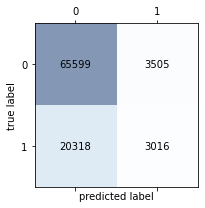

In [203]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_binarystd_test,y_pred)
plot_confusion_matrix(confmat)

##### Distintas métricas

Accuracy:  0.7422813128799844
Recall (Sensitivity):  0.1292534499014314
Specificity:  0.9492793470710813
Precision:  0.46250575065174054
F1:  0.2020432088427399


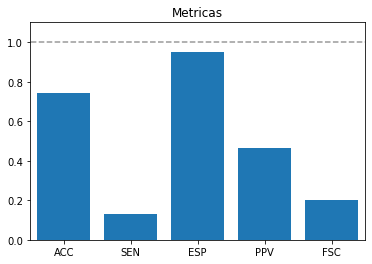

In [204]:
calcula_metricas(confmat)

##### Curva ROC

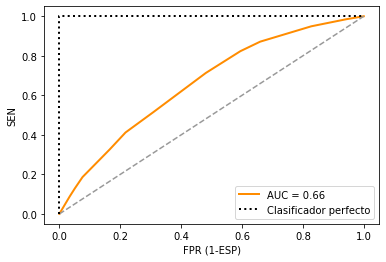

In [189]:
from sklearn.metrics import roc_curve, auc

y_scores = knn.predict_proba(X_test_knn_1)
ejex, ejey, _ = roc_curve(y_binarystd_test, y_scores[:, 1])
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Aplicando un modelo knn con k = 18 y con una única variable (int_rate), se obtiene un nivel de accuracy de 0.742 (acierta un 74.2% de las veces). Hay que tener cuidado con esta métrica ya que el modelo está desbalanceado. En cuanto a la precisión del modelo, obtenemos un 0.4625, lo que significa que el modelo predecirá mal un 53.75% de las veces cuando un cliente no pagará un préstamo. El nivel de sensibilidad es de 0.129, lo que significa que solo es capaz de identificar un 12.9% de los clientes que no pagarán la deuda. Obtenemos un 0.95 de especificidad, por lo que habrá un 5% de falsos positivos (5% de personas que predice como pagadores pero que no pagarán). La F1 es de 0.202, y obtenemos un área bajo la curva de 0.66

Probaremos lo mismo con dos variables y con 3.

## Con dos variables:

In [207]:
datos2 = binarystd[['int_rate','grade']] #Metemos solo 2 variables
X = np.array(datos2)
y = binarystd['loan_status'].values

#Dividimos en entrenamiento y test el dataset binary solo con estas 2 variables.
X_training_knn_2 = X_binarystd[['int_rate','grade']]
X_test_knn_2 = X_binarystd_test[['int_rate','grade']]

In [171]:
#Con esto se definen los hiperparámetros de búsqueda
#Ponemos k en un rango corto por el costo computacional que supone ampliar el rango
ks = list(range(1, 11))

knn = KNeighborsClassifier()
h_parameters = {'n_neighbors':ks}

# Definimos la búsqueda + CV, con la métrica a optimizar
cv = GridSearchCV(knn, h_parameters, cv=5, n_jobs=1, scoring='accuracy')

cv.fit(X, y)

cv.best_estimator_

KNeighborsClassifier(n_neighbors=4)

Para KNN obtenemos de esta forma que el hiperparámetro k que mejor estime será = 4

Aplicamos por lo tanto knn con estos hiperparámetros

In [208]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_training_knn_2, y_binarystd)

y_pred = knn.predict(X_test_knn_2)

##### Matriz de confusión

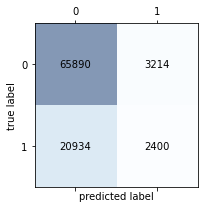

In [209]:
confmat = confusion_matrix(y_binarystd_test,y_pred)
plot_confusion_matrix(confmat)

##### Distintas métricas

Accuracy:  0.7387654427832709
Recall (Sensitivity):  0.10285420416559526
Specificity:  0.953490391294281
Precision:  0.4275026718916993
F1:  0.16581456404587538


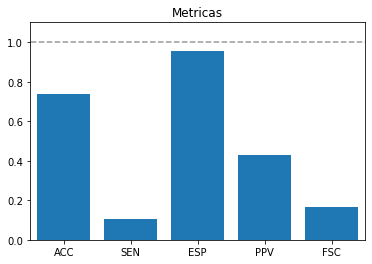

In [210]:
calcula_metricas(confmat)

##### Curva ROC

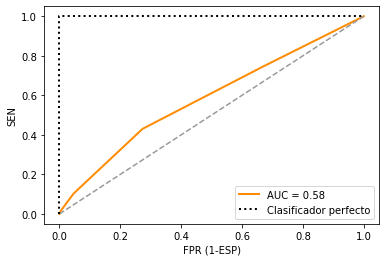

In [195]:
from sklearn.metrics import roc_curve, auc

y_scores = knn.predict_proba(X_test_knn_2)
ejex, ejey, _ = roc_curve(y_binarystd_test, y_scores[:, 1])
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Aplicando un modelo knn con k = 4 y con dos variables (int_rate y grade ), se obtiene un nivel de accuracy de 0.739. En cuanto a la precisión del modelo, obtenemos un 0.428, lo que significa que el modelo predecirá mal un 57.2% de las veces cuando un cliente no pagará un préstamo. El nivel de sensibilidad es de 0.103, lo que significa que solo es capaz de identificar un 10.3% de los clientes que no pagarán la deuda. Obtenemos un 0.95 de especificidad, por lo que habrá un 5% de falsos positivos (5% de personas que predice como pagadores pero que no pagarán). La F1 es de 0.166, y obtenemos un área bajo la curva de 0.58

En este caso, los niveles obtenidos en las métricas son peores, al igual que con el área bajo la curva. Se obtiene un modelo insatisfactorio, por lo que probaremos a hacerlo incluyendo 3 variables.

## Ahora con 3 variables:

In [196]:
datos3 = binarystd[['int_rate','grade','term']] #Metemos solo 3 variables
X = np.array(datos3)
y = binarystd['loan_status'].values

#Dividimos en entrenamiento y test el dataset binary solo con estas 3 variables.
X_training_knn_3 = X_binarystd[['int_rate','grade','term']]
X_test_knn_3 = X_binarystd_test[['int_rate','grade','term']]

In [181]:
#Con esto se definen los hiperparámetros de búsqueda
#Ponemos k en un rango corto por el costo computacional que supone ampliar el rango
ks = list(range(2, 11))

knn = KNeighborsClassifier()
h_parameters = {'n_neighbors':ks}

# Definimos la búsqueda + CV, con la métrica a optimizar
cv = GridSearchCV(knn, h_parameters, cv=5, n_jobs=1, scoring='accuracy')

cv.fit(X, y)

cv.best_estimator_

KNeighborsClassifier(n_neighbors=6)

Para KNN obtenemos de esta forma que el hiperparámetro k que mejor estime será = 6

Aplicamos por lo tanto knn con estos hiperparámetros

In [211]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_training_knn_3, y_binarystd)

y_pred = knn.predict(X_test_knn_3)

##### Matriz de confusión

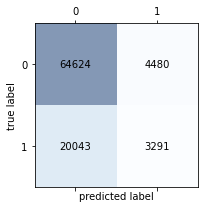

In [212]:
confmat = confusion_matrix(y_binarystd_test,y_pred)
plot_confusion_matrix(confmat)

##### Distintas métricas

Accuracy:  0.7347086695947554
Recall (Sensitivity):  0.14103882746207252
Specificity:  0.9351701782820098
Precision:  0.4234976193540085
F1:  0.21160585114933295


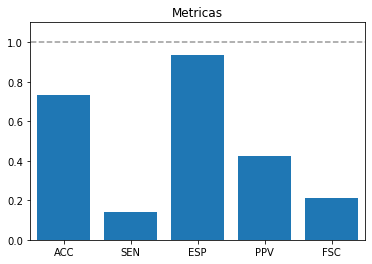

In [213]:
calcula_metricas(confmat)

##### Curva ROC

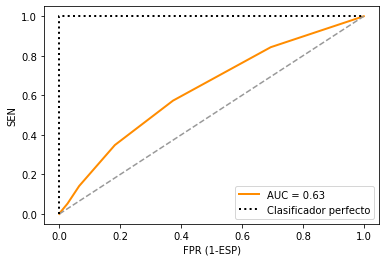

In [214]:
from sklearn.metrics import roc_curve, auc

y_scores = knn.predict_proba(X_test_knn_3)
ejex, ejey, _ = roc_curve(y_binarystd_test, y_scores[:, 1])
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Aplicando un modelo knn con k = 6 y con tres variables (int_rate, grade y term), se obtiene un nivel de accuracy de 0.735. En cuanto a la precisión del modelo, obtenemos un 0.423, lo que significa que el modelo predecirá mal un 57.7% de las veces cuando un cliente no pagará un préstamo. El nivel de sensibilidad es de 0.141, lo que significa que es capaz de identificar un 14.1% de los clientes que no pagarán la deuda. Obtenemos un 0.935 de especificidad, por lo que habrá un 6.5% de falsos positivos (6.5% de personas que predice como pagadores pero que no pagarán). La F1 es de 0.212, y obtenemos un área bajo la curva de 0.63

Al incluir 3 variables en vez de 2, mejora ligeramente el modelo, ya que se obtiene un nivel de accuracy de 0.74 (sigue siendo menor que el porcentaje de observaciones que tenemos clasificadas como que no defraudan), mejora la sensibilidad y se tiene un porcentaje de área bajo la curva mayor. Sin embargo, seguimos sin obtener un buen modelo.

Si tuvieramos una potencia computacional mayor, podríamos porbar a incluir más variables en los modelos KNN. En cuanto a los resultados obtenidos, el mejor modelo obtenido es el de 1 variable (int_rate), con nivel de 0.742 de accuracy y 0.66 de área bajo la curva.

## Arbol de decision simple

Utilizaremos las variables que más importancia tienen en loan_status: grade,int_rate,term y sub_grade

In [126]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['loan_status'] = le.fit_transform(data['loan_status'])

In [120]:
from sklearn.model_selection import train_test_split

# preparamos los datos
X = data[['grade', 'int_rate', 'term', 'sub_grade']].values
y = data['loan_status'].values
#Volvemos a dividir aquí en train y test porque resulta más cómodo hacerlo así
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print('Datos train: ', X_train.shape)
print('Datos test:  ', X_test.shape)

Datos train:  (707884, 4)
Datos test:   (176971, 4)


In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# creamos el modelo y ajustamos
treeModel = DecisionTreeClassifier()
treeModel.fit(X_train, y_train)

y_test_predicted = treeModel.predict(X_test)
print(treeModel.score(X_test,y_test))

0.6514852715981715


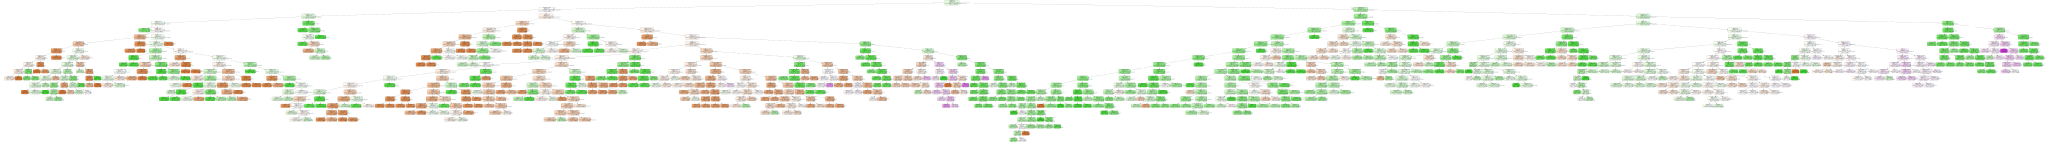

In [124]:
#hacer pip install graphviz
import graphviz

dot_data = tree.export_graphviz(treeModel, out_file=None, 
                         feature_names=['grade', 'int_rate', 'term', 'sub_grade'],  
                         class_names=['Current','Fully Paid','Charged Off','Delays'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 

graph

[Text(157.74852373784407, 212.26285714285714, 'term <= 48.0\ngini = 0.607\nsamples = 707884\nvalue = [276174, 338309, 15688, 77713]\nclass = Fully Paid'),
 Text(55.40628278904118, 201.90857142857143, 'int_rate <= 10.95\ngini = 0.596\nsamples = 489206\nvalue = [218252, 216841, 8921, 45192]\nclass = Current'),
 Text(30.337917993630576, 191.5542857142857, 'int_rate <= 10.285\ngini = 0.546\nsamples = 205567\nvalue = [87960, 106683, 2274, 8650]\nclass = Fully Paid'),
 Text(19.663597588717018, 181.2, 'int_rate <= 5.625\ngini = 0.551\nsamples = 185231\nvalue = [84905, 90178, 1924, 8224]\nclass = Fully Paid'),
 Text(19.054316424021838, 170.84571428571428, 'gini = 0.378\nsamples = 14666\nvalue = [3401, 11053, 75, 137]\nclass = Fully Paid'),
 Text(20.272878753412193, 170.84571428571428, 'int_rate <= 6.65\ngini = 0.554\nsamples = 170565\nvalue = [81504, 79125, 1849, 8087]\nclass = Current'),
 Text(12.280823475887171, 160.49142857142857, 'int_rate <= 6.44\ngini = 0.449\nsamples = 19768\nvalue = [1

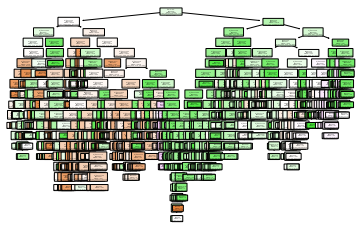

In [125]:
from sklearn import tree

tree.plot_tree(treeModel, feature_names=['grade', 'int_rate', 'term', 'sub_grade'],  
                         class_names=['Current','Fully Paid','Charged Off','Delays'],filled=True, rounded=True)

Lo más útil para clasificar con árboles de decisión sería utilizar esto

In [129]:
features = ['grade', 'int_rate', 'term', 'sub_grade']
test_sample = 3

print('La muestra de test con etiqueta "{0}" y atributos: '.format(data['loan_status'][y_test[test_sample]]))
for i,f in enumerate(features):
    print(' ',f,':',X_test[test_sample,i])

print("ha sido clasificada como: '{0}' ".format(data['loan_status'][y_test_predicted[test_sample]]))

La muestra de test con etiqueta "1" y atributos: 
  grade : 2.0
  int_rate : 14.99
  term : 36.0
  sub_grade : 5.0
ha sido clasificada como: '1' 


Ahora hagamoslo con binary

In [130]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

binary['loan_status'] = le.fit_transform(binary['loan_status'])

/var/folders/12/7v_bpmrd237cdlzgwj2dxdcm0000gn/T/ipykernel_12311/3329490220.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
from sklearn.model_selection import train_test_split

# preparamos los datos
X = binary[['grade', 'int_rate', 'term', 'sub_grade']].values
y = binary['loan_status'].values
#Volvemos a dividir aquí en train y test porque resulta más cómodo hacerlo así
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print('Datos train: ', X_train.shape)
print('Datos test:  ', X_test.shape)

Datos train:  (369751, 4)
Datos test:   (92438, 4)


In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# creamos el modelo y ajustamos
treeModel = DecisionTreeClassifier()
treeModel.fit(X_train, y_train)

y_test_predicted = treeModel.predict(X_test)
print(treeModel.score(X_test,y_test))

0.7523096562019949


In [ ]:
#hacer pip install graphviz
import graphviz

dot_data = tree.export_graphviz(treeModel, out_file=None, 
                         feature_names=['grade', 'int_rate', 'term', 'sub_grade'],  
                         class_names=['Fully Paid','Morosos'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 

graph

[Text(123.08622656250002, 210.645, 'grade <= 1.5\ngini = 0.378\nsamples = 369751\nvalue = [276325, 93426]\nclass = Fully Paid'),
 Text(39.75750000000001, 197.055, 'grade <= 0.5\ngini = 0.232\nsamples = 158013\nvalue = [136806, 21207]\nclass = Fully Paid'),
 Text(14.508000000000001, 183.465, 'sub_grade <= 3.5\ngini = 0.146\nsamples = 59641\nvalue = [54908, 4733]\nclass = Fully Paid'),
 Text(5.952000000000001, 169.875, 'int_rate <= 6.135\ngini = 0.11\nsamples = 27559\nvalue = [25954, 1605]\nclass = Fully Paid'),
 Text(1.1904000000000001, 156.285, 'int_rate <= 5.625\ngini = 0.078\nsamples = 8895\nvalue = [8535, 360]\nclass = Fully Paid'),
 Text(0.5952000000000001, 142.695, 'gini = 0.109\nsamples = 3612\nvalue = [3404, 208]\nclass = Fully Paid'),
 Text(1.7856, 142.695, 'int_rate <= 5.965\ngini = 0.056\nsamples = 5283\nvalue = [5131, 152]\nclass = Fully Paid'),
 Text(1.1904000000000001, 129.10500000000002, 'gini = 0.068\nsamples = 770\nvalue = [743, 27]\nclass = Fully Paid'),
 Text(2.380800

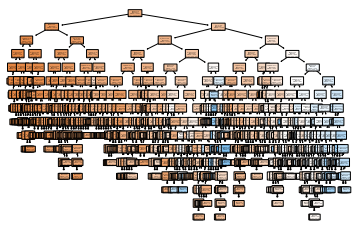

In [133]:
from sklearn import tree

tree.plot_tree(treeModel, feature_names=['grade', 'int_rate', 'term', 'sub_grade'],  
                         class_names=['Fully Paid','Morosos'],filled=True, rounded=True)

In [134]:
features = ['grade', 'int_rate', 'term', 'sub_grade']
test_sample = 3

print('La muestra de test con etiqueta "{0}" y atributos: '.format(data['loan_status'][y_test[test_sample]]))
for i,f in enumerate(features):
    print(' ',f,':',X_test[test_sample,i])

print("ha sido clasificada como: '{0}' ".format(data['loan_status'][y_test_predicted[test_sample]]))

La muestra de test con etiqueta "1" y atributos: 
  grade : 2.0
  int_rate : 13.99
  term : 60.0
  sub_grade : 3.0
ha sido clasificada como: '1' 
